# Проект: Исследование рынка электронных игр

**Оглавление**<a id='toc0_'></a>    
- 1. [Загрузка и первичный анализ данных](#toc1_)    
  - 1.1. [Вывод по разделу 1](#toc1_1_)    
- 2. [Подготовка и предобработка данных](#toc2_)    
  - 2.1. [Унификация названий столбцов и индексов](#toc2_1_)    
  - 2.2. [Анализ типов данных](#toc2_2_)    
  - 2.3. [Изучение и заполнение пропусков](#toc2_3_)    
  - 2.4. [Проверка на наличие дубликатов](#toc2_4_)    
  - 2.5. [Добавление новых столбцов](#toc2_5_)    
  - 2.6. [Вывод по разделу 2](#toc2_6_)    
- 3. [Исследовательский анализ и ответы на вопросы](#toc3_)    
  - 3.1. [Определение зависимости количества выпущенных игр от года выпуска](#toc3_1_)    
  - 3.2. [Определение зависимостей от типа игровой платформы](#toc3_2_)    
  - 3.3. [Определение влияния оценок пользователей и критиков на основе ТОП-5 платформ](#toc3_3_)    
  - 3.4. [Определение зависимости от жанра игры](#toc3_4_)    
  - 3.5. [Определение специфики региональных рынков и портретов пользователей регионов](#toc3_5_)    
  - 3.6. [Вывод по разделу 3](#toc3_6_)    
- 4. [Проверка гипотез](#toc4_)    
  - 4.1. [Проверка гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые"](#toc4_1_)    
  - 4.2. [Проверка гипотезы "средние пользовательские рейтинги жанров Action и Sports разные"](#toc4_2_)    
  - 4.3. [Вывод по разделу 4](#toc4_3_)    
- 5. [Общий вывод](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Задание**

Заказчик: интернет-магазин «Стримчик», продажи игр по всему миру.

В ходе исследования необходимо провести анализ рынка электронных игр, выявить определяющие успешность игр закономерности и взаимосвязи, ответить на исследовательские вопросы. Это позволит интернет-магазину сделать ставку на потенциально популярные продукты, спланировать рекламные кампании и спрогнозировать продажи на 2017г.

Входные данные - информация датированная 2016г. и ранее из открытых источников, в частности: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, рейтинги ESRB (Entertainment Software Rating Board).

План работы:
1. Загрузка и первичный анализ данных.
2. Подготовка и предобработка данных.
3. Исследовательский анализ и ответы на вопросы.
4. Проверка гипотез.
5. Общий вывод.

## 1. <a id='toc1_'></a>[Загрузка и первичный анализ данных](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display

In [2]:
# функция отображения графических данных по региону
# в аргументе получает название столбца с продажами датасета 'data'
def portret_reg(region):
    
    data_act.groupby('platform')[region].sum().sort_values(ascending=False).head(5).plot(
        kind='bar', figsize=(16, 15), grid=True, rot=0, ax=plt.subplot(2, 2, 1))
    plt.title('ТОП-5 игровых платформ')
    plt.xlabel('Платформа')
    plt.ylabel('Продажи, млн. копий')

    data_act.groupby('platform')[region].sum().sort_values().plot(
        kind='pie', autopct='%1.1f%%', ax=plt.subplot(2, 2, 2))
    plt.title('Структура рынка в разрезе игровых платформ')
    plt.xlabel('')
    plt.ylabel('')

    data_act.groupby('genre')[region].sum().sort_values(ascending=False).head(5).plot(
        kind='bar', grid=True, rot=0, ax=plt.subplot(2, 2, 3))
    plt.title('ТОП-5 игровых жанров')
    plt.xlabel('Жанр')
    plt.ylabel('Продажи, млн. копий')
    
    data_act.groupby('genre')[region].sum().sort_values().plot(
        kind='pie', autopct='%1.1f%%', ax=plt.subplot(2, 2, 4))
    plt.title('Структура рынка в разрезе игровых жанров')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    data_act.groupby('genre')[region].median().sort_values(ascending=False).plot(
    kind='bar', figsize=(16, 5), grid=True, ax=axes[0], xlabel='Жанр игры', ylabel='Продажи, млн. копий',
    title='Медианные значения и диаграммы размаха продаж игр в разбивке по жанрам за актуальный период')

    sns.boxplot(x='genre', y=region, data=data_act.loc[data_act[region] < .5], ax=axes[1]).set(
    xlabel='Жанр игры', ylabel='Продажи, млн. копий')
    plt.xticks(rotation=90)
    plt.show()
    
    data_act.groupby('rating')[region].sum().sort_values(ascending=False).plot(
        kind='bar', figsize=(16, 5), grid=True, rot=0, ax=plt.subplot(1, 2, 1))
    plt.title('Зависимость продаж от рейтинга ESRB')
    plt.xlabel('Рейтинг ESRB')
    plt.ylabel('Продажи, млн. копий')
    
    data_act.groupby('rating')[region].sum().sort_values().plot(
        kind='pie', autopct='%1.1f%%', ax=plt.subplot(1, 2, 2))
    plt.title('Структура рынка в разрезе рейтингов ESRB')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()
    return

In [3]:
# загрузка данных
data = pd.read_csv('/datasets/games.csv')

In [4]:
# загрузка описаний полей
ind = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 
       'User_Score', 'Rating']
polya = ['название игры', 'платформа', 'год выпуска', 'жанр игры', 'продажи в Северной Америке (миллионы проданных копий)', 
         'продажи в Европе (миллионы проданных копий)', 'продажи в Японии (миллионы проданных копий)', 
         'продажи в других странах (миллионы проданных копий)', 'оценка критиков (максимум 100)', 
         'оценка пользователей (максимум 10)', 'рейтинг от организации ESRB']
opisanie = pd.DataFrame(data=polya, index=ind, columns=['opisanie'])

In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.info()
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


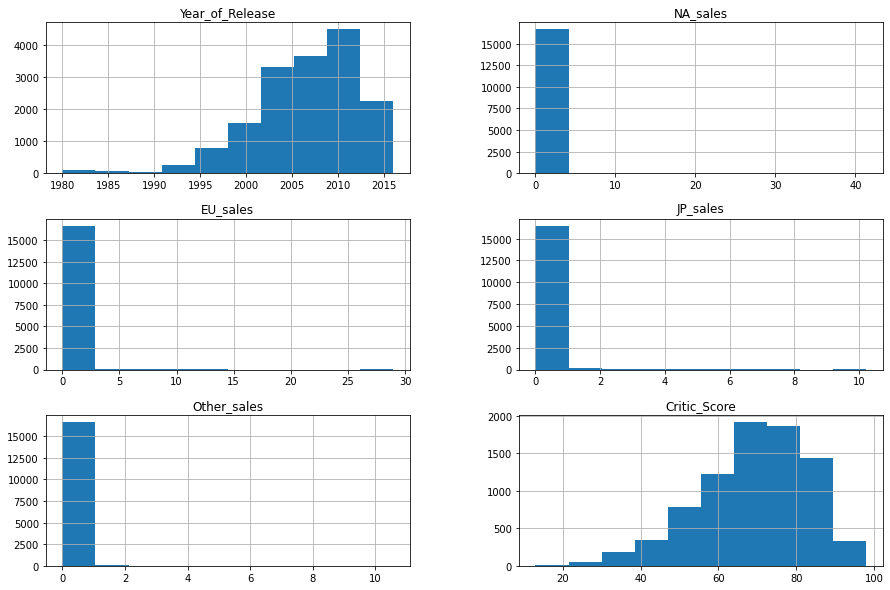

In [7]:
data.hist(figsize=(15, 10))
plt.show()

### 1.1. <a id='toc1_1_'></a>[Вывод по разделу 1](#toc0_)
Данные успешно загружены. Объем выборки составляет около 17 тысяч строк, этого достаточно для объективного исследования. Есть пропуски в данных, некорректные значения. Требуется дополнительный анализ с последующим дозаполнением, корректировкой и/или удалением некорректных данных.

## 2. <a id='toc2_'></a>[Подготовка и предобработка данных](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Унификация названий столбцов и индексов](#toc0_)

In [8]:
# приведем названия столбцов к нижнему регистру с удалением возможных пробелов
data.columns = data.columns.str.lower().str.strip().str.replace("   "," ").str.replace("  "," ").str.replace(" ","_")
display(data.columns)
# аналогично приведем к нижнему регистру с удаленим возможных пробелов индексы в таблице описаний полей
opisanie.index = opisanie.index.str.lower().str.strip().str.replace("   "," ").str.replace("  "," ").str.replace(" ","_")
display(opisanie.index)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2. <a id='toc2_2_'></a>[Анализ типов данных](#toc0_)

In [9]:
# посмотрим типы данных в столбцах
pd.set_option('display.max_colwidth', None)
display(data.dtypes.to_frame(name='type').join(opisanie))
# и их уникальные значения
print('Уникальные значения годов выпуска: \n', data['year_of_release'].unique())
print('Уникальные значения оценок критиков: \n', data['critic_score'].unique())
print('Уникальные значения оценок пользователей: \n', data['user_score'].unique())

,type,opisanie
name,object,название игры
platform,object,платформа
year_of_release,float64,год выпуска
genre,object,жанр игры
na_sales,float64,продажи в Северной Америке (миллионы проданных копий)
eu_sales,float64,продажи в Европе (миллионы проданных копий)
jp_sales,float64,продажи в Японии (миллионы проданных копий)
other_sales,float64,продажи в других странах (миллионы проданных копий)
critic_score,float64,оценка критиков (максимум 100)
user_score,object,оценка пользователей (максимум 10)


Уникальные значения годов выпуска: 
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Уникальные значения оценок критиков: 
 [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
Уникальные значения оценок пользователей: 
 ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' 

Данные, содержащие "год выпуска" и "оценку критиков", предполагают целое число.
Данные, содержащие "оценку пользователей", предполагают числа с одним знаком после запятой.

Аббревиатура "tbd" ("To Be Determined") дополнительной информации для заполнения пропущенных полей не дает, поэтому сразу заменим на NaN.

In [10]:
# изменение типов данных
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
# отображение результатов изменений
display(data.dtypes.to_frame(name='type').join(opisanie))

,type,opisanie
name,object,название игры
platform,object,платформа
year_of_release,Int64,год выпуска
genre,object,жанр игры
na_sales,float64,продажи в Северной Америке (миллионы проданных копий)
eu_sales,float64,продажи в Европе (миллионы проданных копий)
jp_sales,float64,продажи в Японии (миллионы проданных копий)
other_sales,float64,продажи в других странах (миллионы проданных копий)
critic_score,Int64,оценка критиков (максимум 100)
user_score,float64,оценка пользователей (максимум 10)


### 2.3. <a id='toc2_3_'></a>[Изучение и заполнение пропусков](#toc0_)

In [11]:
# выведем столбцы, имеющие пропуски данных
display(data.isna().agg('sum').sort_values(ascending=False).to_frame(name='пропущено').query('пропущено > 0')
        .join(round(data.isna().mean()*100, 1).sort_values(ascending=False).to_frame(name='пропущено, %'))
        .join(opisanie))

,пропущено,"пропущено, %",opisanie
user_score,9125,54.6,оценка пользователей (максимум 10)
critic_score,8578,51.3,оценка критиков (максимум 100)
rating,6766,40.5,рейтинг от организации ESRB
year_of_release,269,1.6,год выпуска
name,2,0.0,название игры
genre,2,0.0,жанр игры


In [12]:
# посмотрим строки в которых отсутствуют название и жанр игры
display(data[data['name'].isna()])
display(data[data['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Это одни и те же две строки. Восстановить данные в них не представляется возможным, поэтому удалим. На дальнейшее исследование это не повлияет.

In [13]:
# удаление строк без названия и жанра игры
data.dropna(subset=['name'], inplace=True)

In [14]:
print('Уникальные значения оценок пользователей: \n', data['user_score'].value_counts().sort_index(), '\n-----------------------------------------')
print('Уникальные значения оценок критиков: \n', data['critic_score'].value_counts().sort_index(), '\n-----------------------------------------')
print('Уникальные значения рейтингов ESRB: \n', data['rating'].value_counts())

Уникальные значения оценок пользователей: 
 0.0     1
0.2     2
0.3     2
0.5     2
0.6     2
       ..
9.3    31
9.4    11
9.5     6
9.6     2
9.7     1
Name: user_score, Length: 95, dtype: int64 
-----------------------------------------
Уникальные значения оценок критиков: 
 13     1
17     1
19     6
20     3
21     1
      ..
94    37
95    16
96    18
97    11
98     4
Name: critic_score, Length: 82, dtype: Int64 
-----------------------------------------
Уникальные значения рейтингов ESRB: 
 E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64


Аномальных значений не наблюдается.

In [15]:
# подробнее о единственном проставленном рейтинге "AO"
display(data.query('rating == "AO"'))
display(data.query('name == "Grand Theft Auto: San Andreas"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.0,0.09,93,8.6,AO


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.00,0.09,93,8.6,AO
2115,Grand Theft Auto: San Andreas,PC,2005,Action,0.00,0.93,0.00,0.04,93,8.9,M
10311,Grand Theft Auto: San Andreas,X360,2008,Action,0.08,0.02,0.00,0.01,<NA>,7.5,M


Значения оценок пользователей и критиков не выходят за пределы своих диапазонов 10 и 100 соответственно. Заполнить пропуски по каким-либо средним значениям будет некорректно. Дополнительных источников с оценками у нас также нет. Поэтому оставим пропуски незаполненными.

По аналогичной причине пропуски в рейтингах ESRB оставляем незаполненными.

В части рейтингов ESRB можно выполнить следующие действия по оптимизации количества представленных в таблице категорий:
- заменить рейтинги "K-A" на "E", так как рейтинг "K-A" использовался ESRB до 1998 года, а затем был заменен на "E";
- заменить рейтинги "EC" на "E", так как рейтинг "EC" использовался ESRB до 2018 года, затем был отменен и по смысловой нагрузке соответствует "E";
- заменить рейтинг "AO" на "M" (чтобы сократить количество категорий) по следующим основаниям:
    - это единственная запись из почти 17 тысяч,
    - игра "Grand Theft Auto: San Andreas" для других платформ имеет рейтинг "M",
    - разница в смысловой нагрузке рейтингов "AO" на "M" один год (старше 18 и старше 17 лет),
    - в базе есть и останутся единичные ошибки, которые не найти без 100% сравнения каждой строки таблицы с рейтингом в первоисточнике (например, на официальном сайте ESRB); в качестве примера: "Grand Theft Auto: San Andreas" для платформ PC и PS2 по информации на сайте ESRB имеет рейтинг "AO", а не "M", как указано в таблице;
- удалить рейтинги "RP", так как это означает "Rating Pending" (рейтинг в ожидании), т.е. не присвоен.

In [16]:
# меняем категорию "K-A" на "E"
data['rating'].where(data['rating'] != 'K-A', 'E', inplace=True)
# меняем категорию "EC" на "E"
data['rating'].where(data['rating'] != 'EC', 'E', inplace=True)
# меняем категорию "EC" на "E"
data['rating'].where(data['rating'] != 'AO', 'M', inplace=True)
# удаляем "RP"
data['rating'].where(data['rating'] != 'RP', np.NaN, inplace=True)

print('Уникальные значения рейтингов ESRB после внесения изменений: \n', data['rating'].value_counts())

Уникальные значения рейтингов ESRB после внесения изменений: 
 E       4001
T       2961
M       1564
E10+    1420
Name: rating, dtype: int64


In [17]:
# посмотрим строки в которых отсутствует год выпуска игры и уникальные значения года выпуска
display(data[data['year_of_release'].isna()])
print('Уникальные значения года выпуска игр: \n', data['year_of_release'].value_counts().sort_index())

# дополнительно посмотрим как выглядят игры с отсутствующим годом выпуска, в том числе написанные для нескольких платформ
display(data.query('name == "FIFA Soccer 2004"'))
display(data.query('name == "wwe Smackdown vs. Raw 2006"'))
display(data.query('name == "Space Invaders"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Уникальные значения года выпуска игр: 
 1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
2606,FIFA Soccer 2004,XB,2003,Sports,0.24,0.49,0.00,0.05,82,8.2,E
12029,FIFA Soccer 2004,GC,2003,Sports,0.05,0.01,0.00,0.00,83,6.2,E
13086,FIFA Soccer 2004,GBA,2003,Sports,0.04,0.01,0.00,0.00,82,7.9,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.0,0.41,<NA>,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
4264,Space Invaders,SNES,1994,Shooter,0.00,0.00,0.46,0.00,<NA>,NaN,NaN
8580,Space Invaders,N64,1999,Shooter,0.13,0.03,0.00,0.00,<NA>,NaN,NaN
10383,Space Invaders,GBA,2002,Shooter,0.08,0.03,0.00,0.00,<NA>,NaN,NaN


Аномальных значений среди года выпуска игр не наблюдается.

Дозаполнить пропуски при отсутствии дополнительных источников информации не представляется возможным по следующим причинам:
- Есть игры, написанные для нескольких платформ, с проставленным годом выпуска для части из них, но поставить такой же год для пропущенных значений оставшихся платформ нельзя, так как одна и таже игра могла выпускаться для разных платформ в разные годы. Пример: игра "Space Invaders".
- Наличие цифр в названии игры также не говорит, что это год выпуска и им можно заполнить пропуски. Пример: игра "FIFA Soccer 2004".

Год выпуска игры имеет важное значение для данного исследования. Есть вариант удалить записи с пропусками года выпуска игры. Таких записей относительно немного (1,6%). С другой стороны мы видим, что другие поля в строках с пропущенным годом выпуска заполнены и могут нести полезную информацию. В связи с этим не будем удалять их из первичной базы, а в дальнейшем исследовании, после определения актуального периода сформируем отдельную базу только с нужными значениями года и без пропусков.

In [18]:
print('Итоговая информация о пропусках в данных:')
display(data.isna().agg('sum').sort_values(ascending=False).to_frame(name='пропущено').query('пропущено > 0')
        .join(round(data.isna().mean()*100, 1).sort_values(ascending=False).to_frame(name='пропущено, %'))
        .join(opisanie))

Итоговая информация о пропусках в данных:


,пропущено,"пропущено, %",opisanie
user_score,9123,54.6,оценка пользователей (максимум 10)
critic_score,8576,51.3,оценка критиков (максимум 100)
rating,6767,40.5,рейтинг от организации ESRB
year_of_release,269,1.6,год выпуска


### 2.4. <a id='toc2_4_'></a>[Проверка на наличие дубликатов](#toc0_)

In [19]:
# проверка на наличие явных дубликатов
display(data.loc[data.duplicated()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены дубликаты, иногда они сильно искажают анализ.</font>

Явные дубликаты отсутствуют.

Проверим наличие неявных дубликатов.  
Уникальным определяющим элементом этих данных (ключом) является сочетание полей имени и платформы игры. Проверим на наличие дубликатов по этим двум полям.

In [20]:
display(data.loc[data.duplicated(['name', 'platform'], keep=False)].sort_values(by='name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43,4.1,E10+
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43,4.1,E10+


Обнаружено 4 пары дублированных строк:

1. Из пары "Madden NFL 13" для "PS3" удалим строку № 16230, как не имеющую данных о продажах.
2. Из пары "Need for Speed: Most Wanted" для "X360" удалим строку № 1190, так как по данным Интернета игра вышла в 2005г.
3. Из пары "Need for Speed: Most Wanted" для "PC" аналогично удалим строку № 11715, так как по данным Интернета игра вышла в 2005г.
4. Из пары "Sonic the Hedgehog" для "PS3" удалим строку № 4127, как не имеющую года выпуска и имеющую меньше данных о продажах.

In [21]:
# удаление
data.drop(index=[16230, 1190, 11715, 4127], axis=0, inplace=True)
# повторная проверка на дубликаты
display(data.loc[data.duplicated(['name', 'platform'], keep=False)].sort_values(by='name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### 2.5. <a id='toc2_5_'></a>[Добавление новых столбцов](#toc0_)

Определим суммарные продажи во всех регионах и занесем их в отдельный столбец таблицы.

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16441 non-null  Int64  
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   Int64  
 9   user_score       7586 non-null   float64
 10  rating           9942 non-null   object 
 11  total_sales      16709 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN,0.01


### 2.6. <a id='toc2_6_'></a>[Вывод по разделу 2](#toc0_)

Выполнена предобработка данных, включающая в себя:
- унификацию названий столбцов;
- анализ и корректировку типов данных;
- изучение и заполнение пропусков;
- исследование и корректировку аномальных значений.

Осуществлена проверка на наличие явных и неявных дубликатов записей, внесен вспомогательный столбец, необходимый для дальнейшего анализа.

В общем случае пропуски и некорректность данных могут возникать по следующим основным причинам:
- неполные данные;
- ошибки "человеческого фактора";
- технические ошибки при копированиях, переносах, слияниях и т.п.

В нашем случае неполнота данных в первую очередь может быть вызвана неполнотой самих данных, которые собирали из открытых источников. В большей степени это касается оценок пользователей и критиков, а также рейтинга ESRB. Не все открытые источники содержат такую информацию, не все игры могут иметь оценку, а в случае рейтинга ESRB не все игры получают именно этот рейтинг, так как это только одна из нескольких систем рейтингования.  
Пропуски в годах выпуска игр могут быть вызваны как неполнотой данных, так и техническими ошибками.

In [23]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16709 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16709 non-null  object 
 1   platform         16709 non-null  object 
 2   year_of_release  16441 non-null  Int64  
 3   genre            16709 non-null  object 
 4   na_sales         16709 non-null  float64
 5   eu_sales         16709 non-null  float64
 6   jp_sales         16709 non-null  float64
 7   other_sales      16709 non-null  float64
 8   critic_score     8133 non-null   Int64  
 9   user_score       7586 non-null   float64
 10  rating           9942 non-null   object 
 11  total_sales      16709 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

## 3. <a id='toc3_'></a>[Исследовательский анализ и ответы на вопросы](#toc0_)



### 3.1. <a id='toc3_1_'></a>[Определение зависимости количества выпущенных игр от года выпуска](#toc0_)

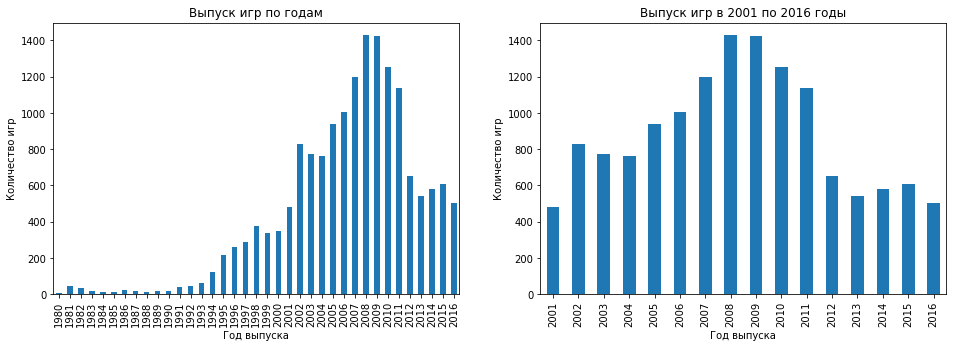

In [24]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', ax=plt.subplot(1, 2, 1), figsize=(16, 5))
plt.title('Выпуск игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

data.query('year_of_release > 2000').groupby('year_of_release')['name'].count().plot(kind='bar', ax=plt.subplot(1, 2, 2))
plt.title('Выпуск игр в 2001 по 2016 годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Для полноты анализа добавим график общих продаж всех игр по годам.

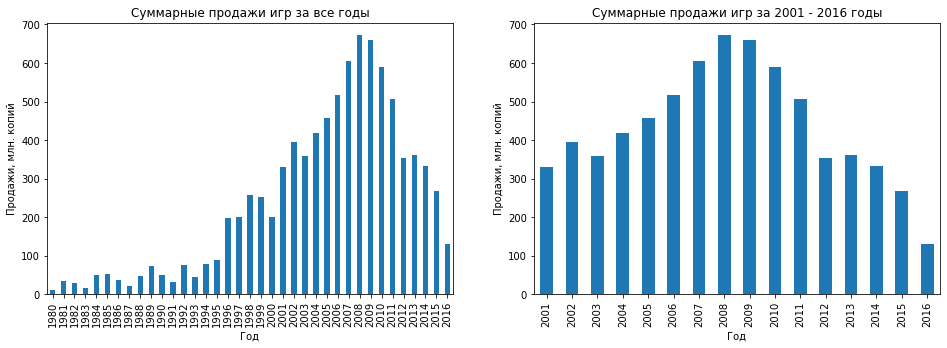

In [25]:
data.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', ax=plt.subplot(1, 2, 1), figsize=(16, 5))
plt.title('Суммарные продажи игр за все годы')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')

data.query('year_of_release > 2000').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', ax=plt.subplot(1, 2, 2))
plt.title('Суммарные продажи игр за 2001 - 2016 годы')
plt.xlabel('Год')
plt.ylabel('Продажи, млн. копий')
plt.show()

Видим, что формы графиков выпуска и продаж игр по годам похожи. Пик выпуска и продаж игр приходится на 2008 и 2009 годы.  
Меньшее количество продаж в 2016 году обусловлено неполными данными за 2016 год.

С точки зрения актуальности применения данных, в дальнейшем исследовании можно использовать значимый период выпуска и продаж игр с 2001 по 2016 годы.

### 3.2. <a id='toc3_2_'></a>[Определение зависимостей от типа игровой платформы](#toc0_)

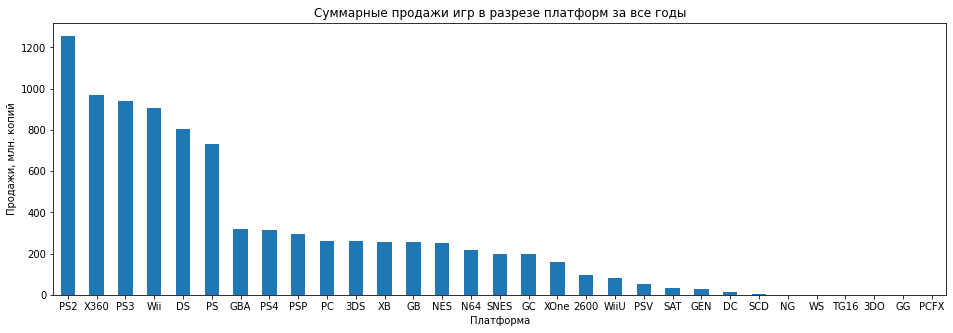

In [26]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 5), rot=0)
plt.title('Суммарные продажи игр в разрезе платформ за все годы')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий')
plt.show()

Первое место по продажам с большим отрывом занимает платформа PS2 (Sony).  
Основные продажи (также с большим отрывом от следующих участвников рынка) осуществляются для 6 игровых платформ:
- PS2 (Sony);
- X360 (Microsoft);
- PS3 (Sony);
- Wii (Nintendo);
- DS (Nintendo);
- PS (Sony).

Можно заметить, что как 6 лидирующих, так и практически всё остальное многообразие игровых платформ принадлежит всего трем производителям: Sony, Microsoft и Nintendo.

Объемы продаж игр для персональных компьютеров занимают всего лишь 10 место и небольшую долю рынка. Подавляющие объемы продаж приходятся на всевозможные виды игровых консолей и станций.

Анализируя выпуск игр по годам, мы определили значащий период с 2001 по 2016 годы. Наложим этот период на распределение продаж по платформам. 

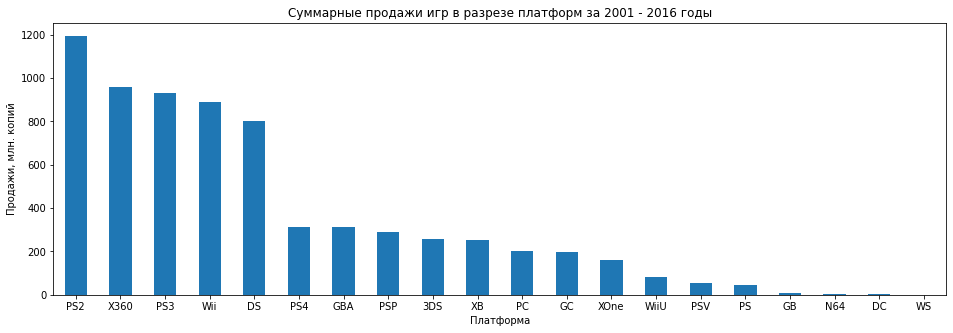

In [27]:
data.query('year_of_release > 2000').groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(
    kind='bar', figsize=(16, 5), rot=0)
plt.title('Суммарные продажи игр в разрезе платформ за 2001 - 2016 годы')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. копий')
plt.show()

Пять лидеров остались прежними. Шестая платформа PS (Sony) на графике отсутствует, так как данная платформа была заменена в 2000 году на платформу PS2 (Sony).

Построим распределение по годам для 5 основных игровых платформ.

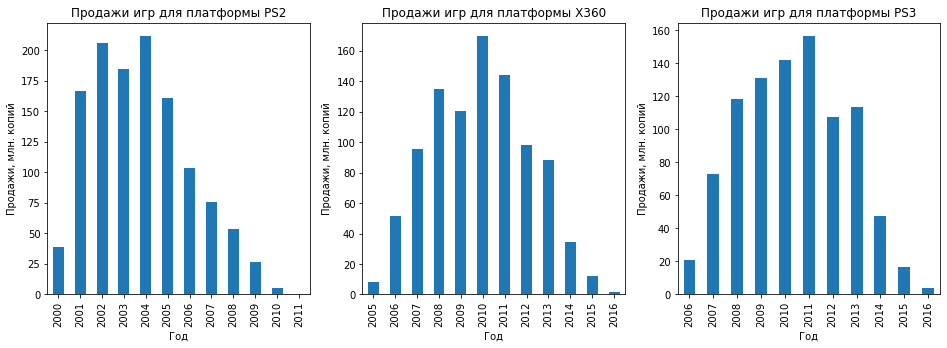

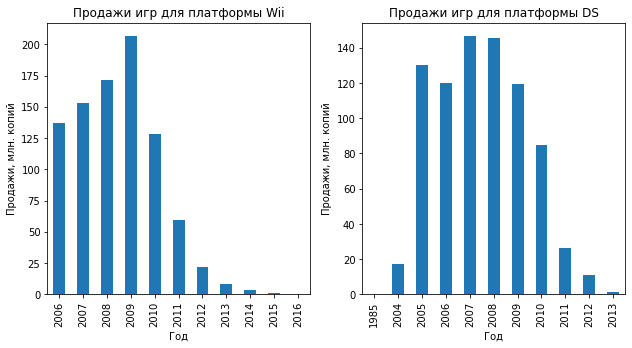

In [28]:
spisok_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
i = 1

for platf in spisok_platform:
    data.query('platform == @platf').groupby('year_of_release')['total_sales'].sum().plot(
        kind='bar', figsize=(16, 5), ax=plt.subplot(1, 3, i))
    plt.title('Продажи игр для платформы '+str(platf))
    plt.xlabel('Год')
    plt.ylabel('Продажи, млн. копий')
    i += 1
    if i == 4:
        plt.show()
        i = 1

На последнем графике видим аномалию для платформы DS - данные за 1985г., когда платформа ещё не существовала. Проверим и удалим эти ошибочные данные.

In [29]:
# смотрим и удаляем странную строку игры 1985 года выпуска для несуществовавшей на тот момент платформы DS
display(data.query('year_of_release == 1985 & platform == "DS"'))
display(data.query('name == "Strongest Tokyo University Shogi DS"'))
data.drop(data.query('year_of_release == 1985 & platform == "DS"').index, inplace=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02


Видим, что срок жизни игровых платформ (продажи не ниже 10% от максимума) составляет:
- для PS2 (Sony), X360 (Microsoft) и PS3 (Sony) - 10 лет;
- для Wii (Nintendo) - 7 лет;
- для DS (Nintendo) - 8 лет.

Отличия сроков жизни у первых трех и последних двух платформ, скорее всего, обусловлены различием внутренних стратегий компаний Sony, Microsoft и Nintendo в части жизненных циклов продуктов (игровых платформ).

Учитывая выявленные сроки жизненного цикла платформ (7 - 10 лет) и основную задачу по планированию продаж на следующий год, определим наиболее перспективные платформы для продаж в 2017 году. Для этого посмотрим платформы с наибольшим количеством продаж за последние 6, 5, 4 и 3 года (с 2011, 2012, 2013 и 2014 года, соответственно).

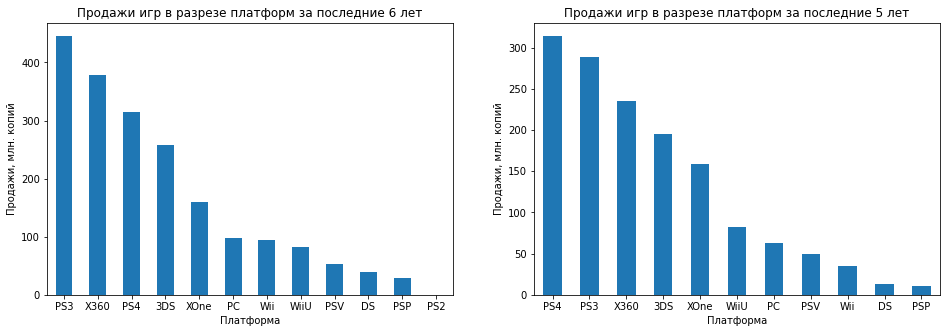

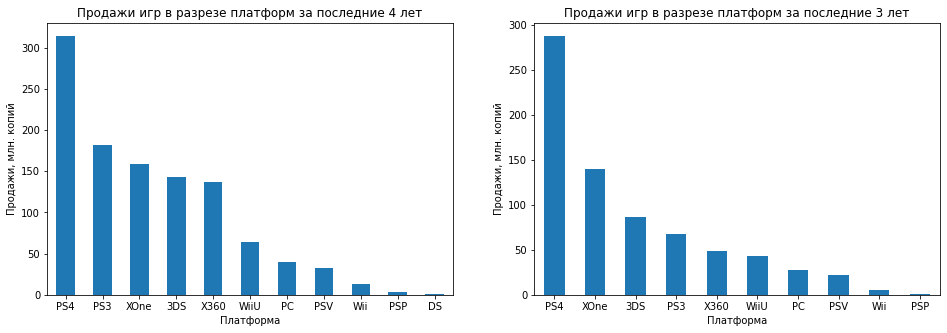

In [30]:
i = 1

for year in [2010, 2011, 2012, 2013]:
    data.query('year_of_release > @year').groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(
        kind='bar', figsize=(16, 5), rot=0, ax=plt.subplot(1, 2, i))
    plt.title('Продажи игр в разрезе платформ за последние {} лет'.format(2016 - year))
    plt.xlabel('Платформа')
    plt.ylabel('Продажи, млн. копий')
    i += 1
    if i == 3:
        plt.show()
        i = 1

Первые 5 позиций все последние годы в разном порядке занимают следующие игровые платформы:
- PS4 (Sony);
- XOne (Microsoft);
- 3DS (Nintendo);
- PS3 (Sony);
- X360 (Microsoft).

Чтобы оценить рынок всесторонне, добавим к этому списку ещё две платформы:
- WiiU (Nintendo) - как вторую платформу от Nintendo, стабильно занимающую 6 место в последние годы;
- PC (персональный компьютер) - как всегда существующую альтернативу игровым консолям и станциям.

Посмотрим, в какой стадии жизненного цикла находятся все эти платформы.

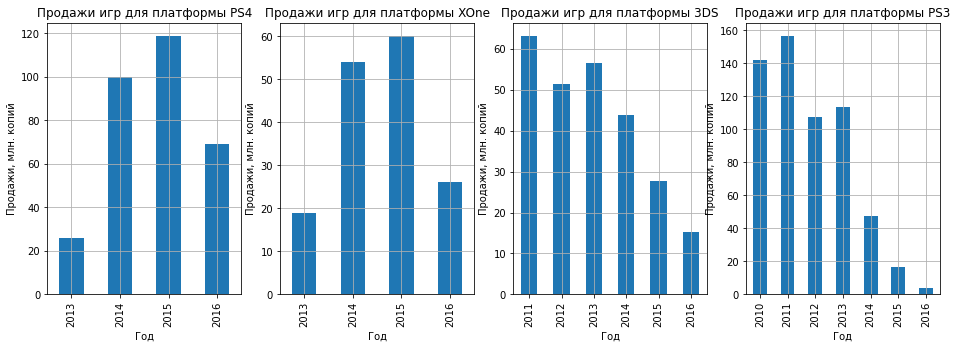

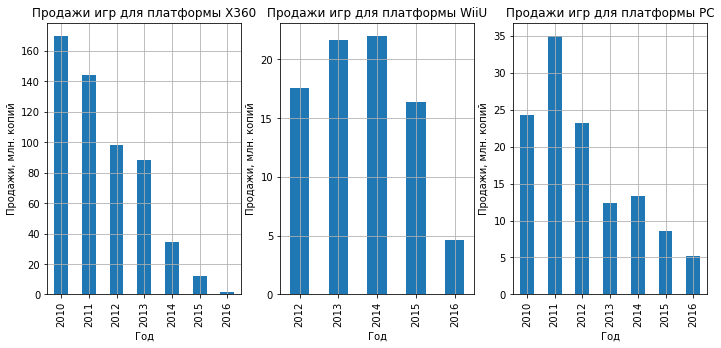

In [31]:
spisok_platform = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC']
i = 1

for platf in spisok_platform:
    data.query('platform == @platf & year_of_release > 2009').groupby('year_of_release')['total_sales'].sum().plot(
        kind='bar', figsize=(16, 5), grid=True, ax=plt.subplot(1, 4, i))
    plt.title('Продажи игр для платформы '+str(platf))
    plt.xlabel('Год')
    plt.ylabel('Продажи, млн. копий')
    i += 1
    if i == 5:
        plt.show()
        i = 1

При анализе и сопоставлении графиков (с учетом того, что данные за 2016г. неполные) просматриваются следующие закономерности:
- Игровая платформа PS4 компании Sony - лидер рынка продаж 2015г. с двукратным отрывом от ближайшего конкурента, при этом продажи PS4 в последние годы растут. Платформа PS3 этой же компании находится в конце жизненного цикла, продажи упали до 10% уровня от максимума, платформа уходит с рынка. На 2017 год имеет смысл планировать продажи игр только для платформы PS4.
- Игровая платформа XOne компании Microsoft занимает второе место по продажам в 2015г., при этом продажи XOne в последние годы растут. Платформа X360 этой же компании находится в конце жизненного цикла, продажи упали ниже 10% уровня от максимума, платформа уходит с рынка. На 2017 год имеет смысл планировать продажи игр только для платформы XOne.
- Игровая платформа 3DS компании Nintendo занимает третье место, а платформа WiiU этой же компании - четвертое место по продажам в 2015г. Обе платформы вышли на рынок практически одновременно: 3DS в 2011г.; WiiU в 2012г. Продажи 3DS в последние годы падают, продажи WiiU в 2015г. снизились, при этом снижения к 10% уровню от максимума продаж не произошло. В данной ситуации имеет смысл планировать продажи на 2017г. по обоим платформам (3DS и WiiU), но в меньшем объеме, чем по PS4 и XOne.
- Продажи игр для персональных компьютеров (PC) занимают последнее место среди рассматриваемых. Наблюдается снижение продаж в 2015г. Так как персональные компьютеры, как игровая платформа, в перспективе будет продолжать существовать, имеет смысл планировать продажи на 2017г. для PC на уровне предыдущих лет.

С учетом фактических жизненных циклов платформ и динамично меняющейся индустрии, устанавим актуальный период в 3 года (2 полных года плюс неполный 2016г.; 2014 - 2016гг.).  
Из вариантов использовать в общей базе фильтр по году и использование отдельной базы с данными только за актуальный период, выбираем использование отдельной базы с данными за актуальный период. Сформируем отдельную базу `data_act` с данными за актуальный период для дальнейшей работы.

Построим график распределения глобальных продаж игр в разбивке по платформам.

In [33]:
# формируем отдельную базу с актуальным периодом за 3 года (2014 - 2016гг.) и далее работаем с этой базой
data_act = data.query('year_of_release > 2013').copy()
data_act.year_of_release.min()

2014

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64 
-----------------------------------------
Параметры выборки глобальных продаж в разрезе игровых платформ за актуальный период 2014 - 2016гг.:
count     10.000
mean      72.945
std       86.355
min        0.360
25%       23.563
50%       45.600
75%       82.055
max      288.150
Name: total_sales, dtype: float64
Межквартильный размах (IQR) = 36.455
Верхняя граница статистически значимой выборки (Q3 + 1,5 * IQR) = 136.738


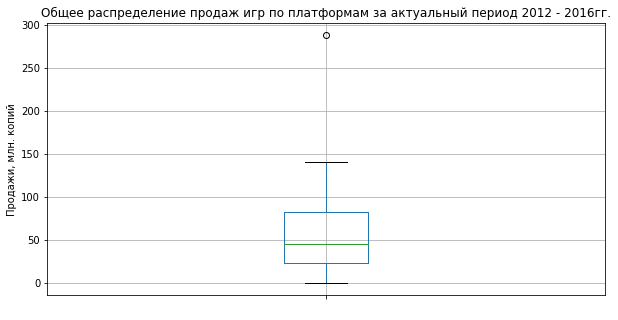

In [34]:
# распечатка выборки и её параметров
print(data_act.groupby('platform')['total_sales'].sum().sort_values(ascending=False), 
      '\n-----------------------------------------')
print('Параметры выборки глобальных продаж в разрезе игровых платформ за актуальный период 2014 - 2016гг.:')
print(data_act.groupby('platform')['total_sales'].sum().describe().round(3))
print('Межквартильный размах (IQR) =', round((82.055 - 45.6), 3))
print('Верхняя граница статистически значимой выборки (Q3 + 1,5 * IQR) =', round(82.055 + 1.5 * (82.055 - 45.6), 3))

# построение диаграммы размаха
data_act.groupby('platform')['total_sales'].sum().plot(kind='box', figsize=(10, 5), grid=True)
plt.title('Общее распределение продаж игр по платформам за актуальный период 2012 - 2016гг.')
plt.xticks(color='w')
plt.ylabel('Продажи, млн. копий')
plt.show()

Максимальные продажи игр среди всех платформ за актуальный период в количестве 288 млн. копий были на платформе PS4, очевидно, это самая популярная платформа за последние годы. Минимальные продажи были на платформе PSP в размере 0,36 млн. копий, это наименее популярная платформа.  
Среднее значение продаж среди всех платформ около 73 млн. копий, при этом медианное значение - 45,6 млн. копий. Распределение имеет наклон вправо за счет выбросов от платформ, лидирующих по количеству продаж с сильным отрывом от остальных (количество продаж от 140 млн. копий и выше).  
Межквартильный размах (IQR) составляет 36,5 млн. копий.  
Верхняя граница статистически значимой выборки (Q3 + 1,5 * IQR) - 136,7 млн. копий.

Построим график распределения годовых продаж игр в разбивке по платформам.

platform  year_of_release
PS4       2015               118.90
          2014               100.00
          2016                69.25
XOne      2015                60.14
          2014                54.07
PS3       2014                47.76
3DS       2014                43.76
X360      2014                34.74
3DS       2015                27.78
XOne      2016                26.15
WiiU      2014                22.03
PS3       2015                16.82
WiiU      2015                16.35
3DS       2016                15.14
PC        2014                13.28
X360      2015                11.96
PSV       2014                11.90
PC        2015                 8.52
PSV       2015                 6.25
PC        2016                 5.25
WiiU      2016                 4.60
PSV       2016                 4.25
Wii       2014                 3.75
PS3       2016                 3.60
X360      2016                 1.52
Wii       2015                 1.14
PSP       2014                 0.24
Wi

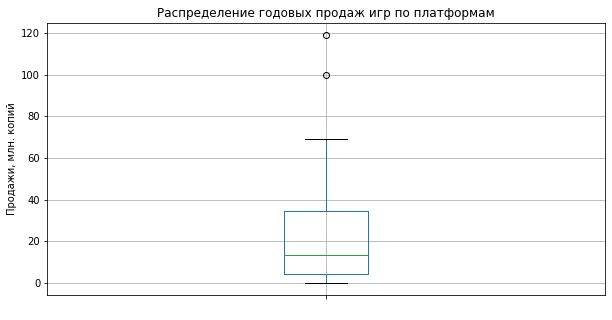

In [35]:
# распечатка выборки и её параметров
print(data_act.groupby(['platform', 'year_of_release'])['total_sales'].sum().sort_values(ascending=False), 
      '\n-----------------------------------------')
print('Параметры выборки годовых продаж в разрезе игровых платформ:')
print(data_act.groupby(['platform', 'year_of_release'])['total_sales'].sum().describe().round(3))
print('Межквартильный размах (IQR) =', round((34.74 - 4.25), 3))
print('Верхняя граница статистически значимой выборки (Q3 + 1,5 * IQR) =', round(34.74 + 1.5 * (34.74 - 4.25), 3))

# построение диаграммы размаха
data_act.groupby(['platform', 'year_of_release'])['total_sales'].sum().plot(kind='box', figsize=(10, 5), grid=True)
plt.title('Распределение годовых продаж игр по платформам')
plt.xticks(color='w')
plt.ylabel('Продажи, млн. копий')
plt.show()

Распределение годовых продаж по платформам имеет среднее значение 25 млн. копий и медианное 13 млн. копий. и также имеет смещение вправо за счет выбросов продаж топовых платформ в годы их наибольшей популярности.

Построим диаграмму размаха (график «ящик с усами») по глобальным продажам игр в разбивке по платформам.  
Отобразим два варианта этой диаграмы: одну полную с выбросами, вторую масштабированную с отображением только нижней части boxplot-ов, что бы были видны медиана и 75% квантиль.

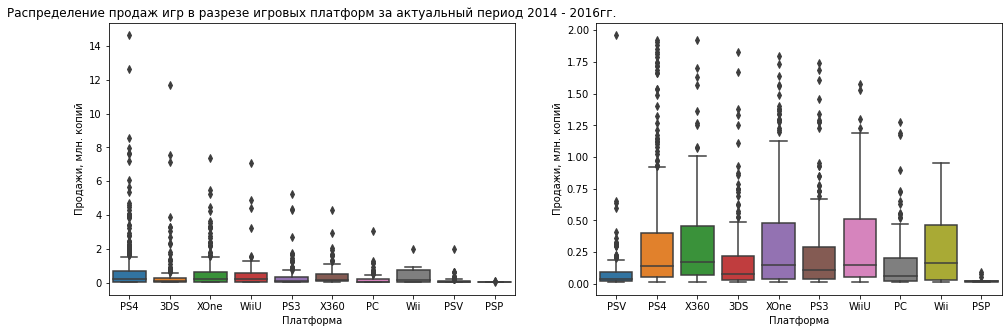

In [36]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(x='platform', y='total_sales', data=data_act, ax=axes[0]).set(xlabel='Платформа', ylabel='Продажи, млн. копий', 
            title='Распределение продаж игр в разрезе игровых платформ за актуальный период 2014 - 2016гг.')

sns.boxplot(x='platform', y='total_sales', data=data_act.loc[data_act['total_sales'] < 2], ax=axes[1]).set(
    xlabel='Платформа', ylabel='Продажи, млн. копий')
plt.show()

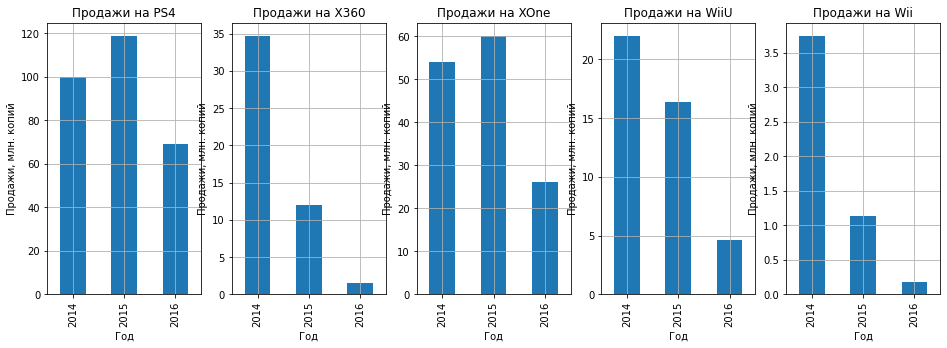

In [37]:
# построим графики продаж для ТОП-5 платформ
spisok_platform = ['PS4', 'X360', 'XOne', 'WiiU', 'Wii']
i = 1

for platf in spisok_platform:
    data_act.query('platform == @platf').groupby('year_of_release')['total_sales'].sum().plot(
        kind='bar', figsize=(16, 5), grid=True, ax=plt.subplot(1, 5, i))
    plt.title('Продажи на '+str(platf))
    plt.xlabel('Год')
    plt.ylabel('Продажи, млн. копий')
    i += 1
plt.show()

В ТОП-5 попадают платформы PS4 (Sony), X360 (Microsoft), XOne (Microsoft), WiiU (Nintendo) и Wii (Nintendo).  
При этом жизненные циклы платформ X360 (Microsoft) и Wii (Nintendo) завершаются, продажи игр для них падают, планировать продажи для этих двух платформ нецелесообразно.
Второй волной идут игровые платформы PS3 (Sony), 3DS (Nintendo) и PC (персональный компьютер). Платформа PS3 (Sony) находится в конце своего жизненного цикла и планировать продажи игр на её основе нецелесообразно. Платформу 3DS (Nintendo) можно рассмотреть для планирования продаж в качестве более перспективной альтернативы Wii (Nintendo), а PC (персональный компьютер) - как общую альтернативу игровым консолям.

### 3.3. <a id='toc3_3_'></a>[Определение влияния оценок пользователей и критиков на основе ТОП-5 платформ](#toc0_)

Коэффициент корреляции продаж игр на платформе PS4 с оценками пользователей: -0.04
Коэффициент корреляции продаж игр на платформе PS4 с оценками критиков: 0.4


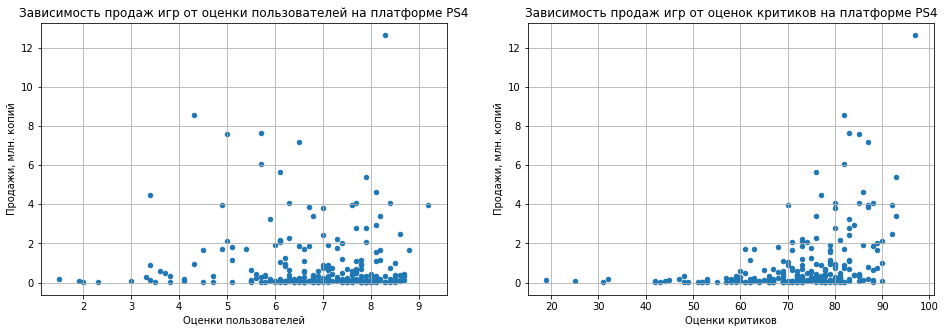

Коэффициент корреляции продаж игр на платформе X360 с оценками пользователей: -0.14
Коэффициент корреляции продаж игр на платформе X360 с оценками критиков: 0.53


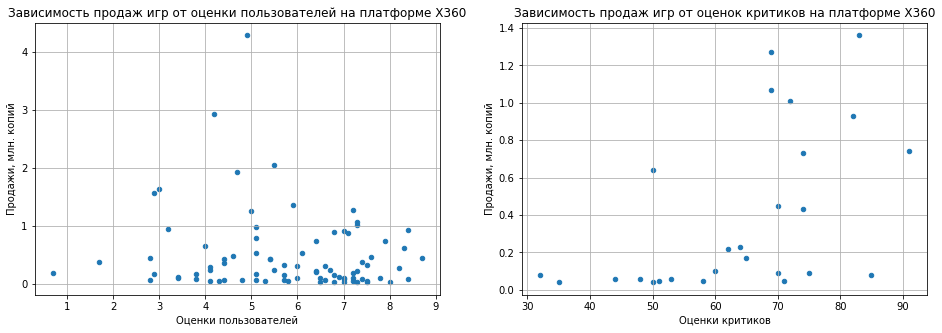

Коэффициент корреляции продаж игр на платформе XOne с оценками пользователей: -0.07
Коэффициент корреляции продаж игр на платформе XOne с оценками критиков: 0.43


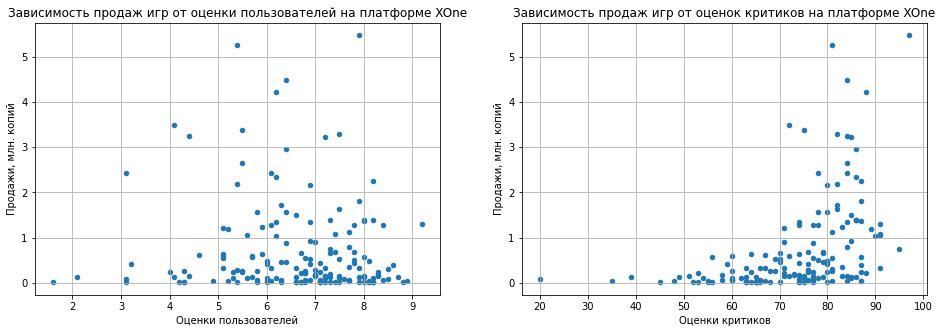

Коэффициент корреляции продаж игр на платформе WiiU с оценками пользователей: 0.41
Коэффициент корреляции продаж игр на платформе WiiU с оценками критиков: 0.37


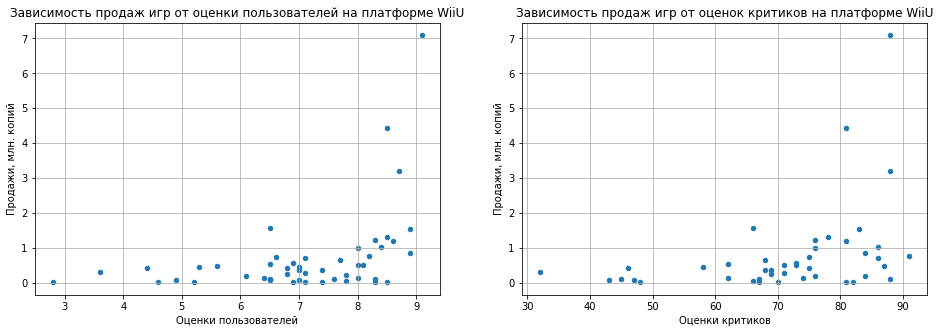

Коэффициент корреляции продаж игр на платформе 3DS с оценками пользователей: 0.22
Коэффициент корреляции продаж игр на платформе 3DS с оценками критиков: 0.31


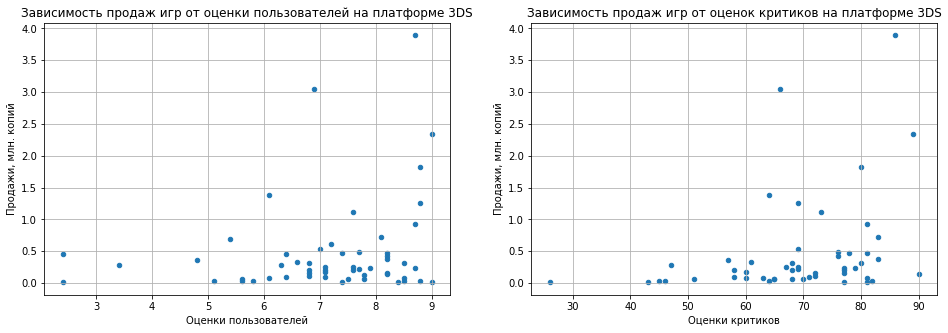

In [38]:
# сделаем расчет корреляции и построим диаграммы рассеяния для ТОП-5 платформ
# платформа Wii (Nintendo) завершает свой жизненный цикл и по ней за актуальный период очень мало оценок, 
# поэтому вместо платформы Wii (Nintendo) исследуем более перспективную платформу той же компании 3DS (Nintendo)  
spisok_platform = ['PS4', 'X360', 'XOne', 'WiiU', '3DS']
data_act['critic_score'] = data_act['critic_score'].astype('float64')

for platf in spisok_platform:
    print('Коэффициент корреляции продаж игр на платформе', platf, 'с оценками пользователей:',
          np.round(data_act.query('platform == @platf')['user_score'].corr(data_act.query('platform == @platf')['total_sales']), 2))
    print('Коэффициент корреляции продаж игр на платформе', platf, 'с оценками критиков:', 
          np.round(data_act.query('platform == @platf')['critic_score'].corr(data_act.query('platform == @platf')['total_sales']), 2))

    data_act.query('platform == @platf').plot(x='user_score', y='total_sales', kind='scatter', figsize=(16, 5), grid=True,
                                         ax=plt.subplot(1, 2, 1))
    plt.title('Зависимость продаж игр от оценки пользователей на платформе '+str(platf))
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи, млн. копий')

    data_act.query('platform == @platf').plot(x='critic_score', y='total_sales', kind='scatter', grid=True,
                                        ax=plt.subplot(1, 2, 2))
    plt.title('Зависимость продаж игр от оценок критиков на платформе '+str(platf))
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи, млн. копий')
    plt.show()

Проанализировав корреляцию и диаграммы рассеяния для 5 платформ можно сказать, что корреляция между оценками критиков и продажами есть и на относительно высоком уровне. Зависимость прослеживается во всех 5 случаях. Это вполне закономерно, так как высокие оценки профессиональных критиков производители могут использовать при продвижении своих продуктов для увеличения объемов продаж.  
Корреляция между оценками пользователей и продажами проявляется только в 2 случаях из 5.

### 3.4. <a id='toc3_4_'></a>[Определение зависимости от жанра игры](#toc0_)

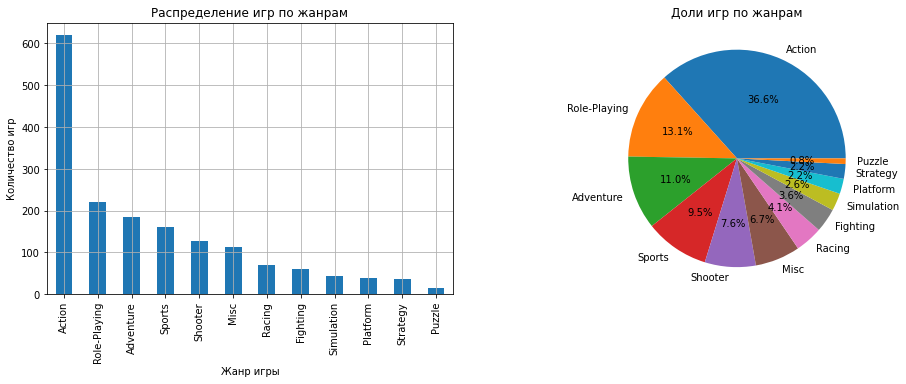

In [39]:
data_act.groupby('genre')['name'].count().sort_values(ascending=False).plot(
    kind='bar', figsize=(16, 5), grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Количество игр')

data_act.groupby('genre')['name'].count().sort_values(ascending=False).plot(
    kind='pie', autopct='%1.1f%%', ax=plt.subplot(1, 2, 2))
plt.title('Доли игр по жанрам')
plt.xlabel('')
plt.ylabel('')
plt.show()

Первое место по количеству выпущенных игр с существенным отрывом занимают жанры Action (экшен).

Следующие четыре места в ТОП-5 с небольшим отрывом друг от друга занимают игры жанров:
- Role-Playing (ролевые);
- Adventure (приключения);
- Sports (спортивные);
- Shooter (стрелялки).

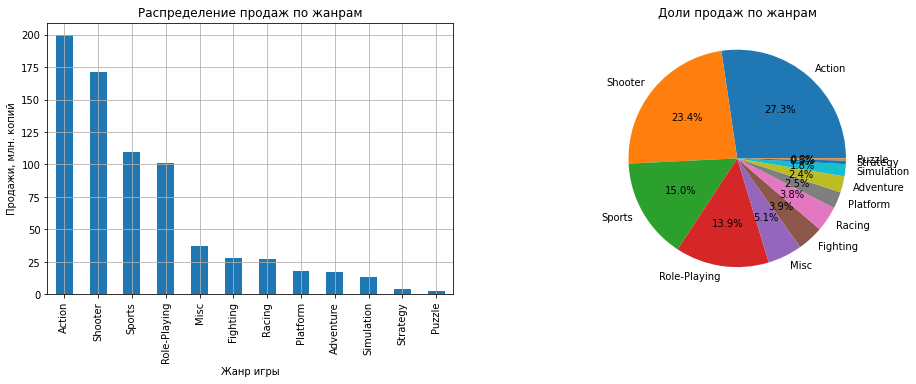

In [40]:
data_act.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(
    kind='bar', figsize=(16, 5), grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр игры')
plt.ylabel('Продажи, млн. копий')

data_act.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(
    kind='pie', autopct='%1.1f%%', ax=plt.subplot(1, 2, 2))
plt.title('Доли продаж по жанрам')
plt.xlabel('')
plt.ylabel('')
plt.show()

При распределении общих объемов продаж по жанрам картина отличается.
- Первое место но уже без большого отрыва от остальных занимают самые массовые игры жанра Action (экшен).
- Гораздо большими объемами по сравнению с остальными выделяются 4 игровых жанра:
    - Action (экшен);
    - Shooter (стрелялки);
    - Sports (спортивные);
    - Role-Playing (ролевые).

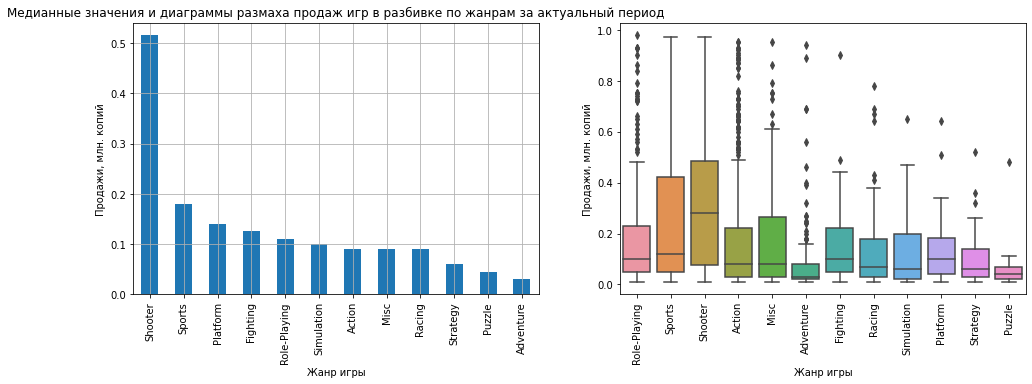

In [41]:
# построим график медианных значений и диаграммы размаха продаж игр в разбивке по жанрам за актуальный период
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
data_act.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(
    kind='bar', figsize=(16, 5), grid=True, ax=axes[0], xlabel='Жанр игры', ylabel='Продажи, млн. копий',
    title='Медианные значения и диаграммы размаха продаж игр в разбивке по жанрам за актуальный период')
sns.boxplot(x='genre', y='total_sales', data=data_act.loc[data_act['total_sales'] < 1], ax=axes[1]).set(
    xlabel='Жанр игры', ylabel='Продажи, млн. копий')
plt.xticks(rotation=90)
plt.show()

Анализируя медианные значения и диаграммы размаха по жанрам, видим, что на самом деле самым стабильным жанром, который приносит доход не зависимо от платформы и значит на который есть устойчивый спрос, является жанр Shooter (стрелялки). По данному показателю он значительно обходит все остальные жанры.

Далее с большим отставанием в ТОП-5 попадают:
- Sports (спортивные);
- Platform (платформеры);
- Fighting (бой/поединок);
- Role-Playing (ролевые).

### 3.5. <a id='toc3_5_'></a>[Определение специфики региональных рынков и портретов пользователей регионов](#toc0_)

Определим специфику рынков и составим портреты пользователей трех основных регионов: NA (Северная Америка), EU (Европа), JP (Япония) и прочих, отдельно не выделенных, регионов.

						--------------------------------------
						| Данные по региону Северная Америка |
						--------------------------------------


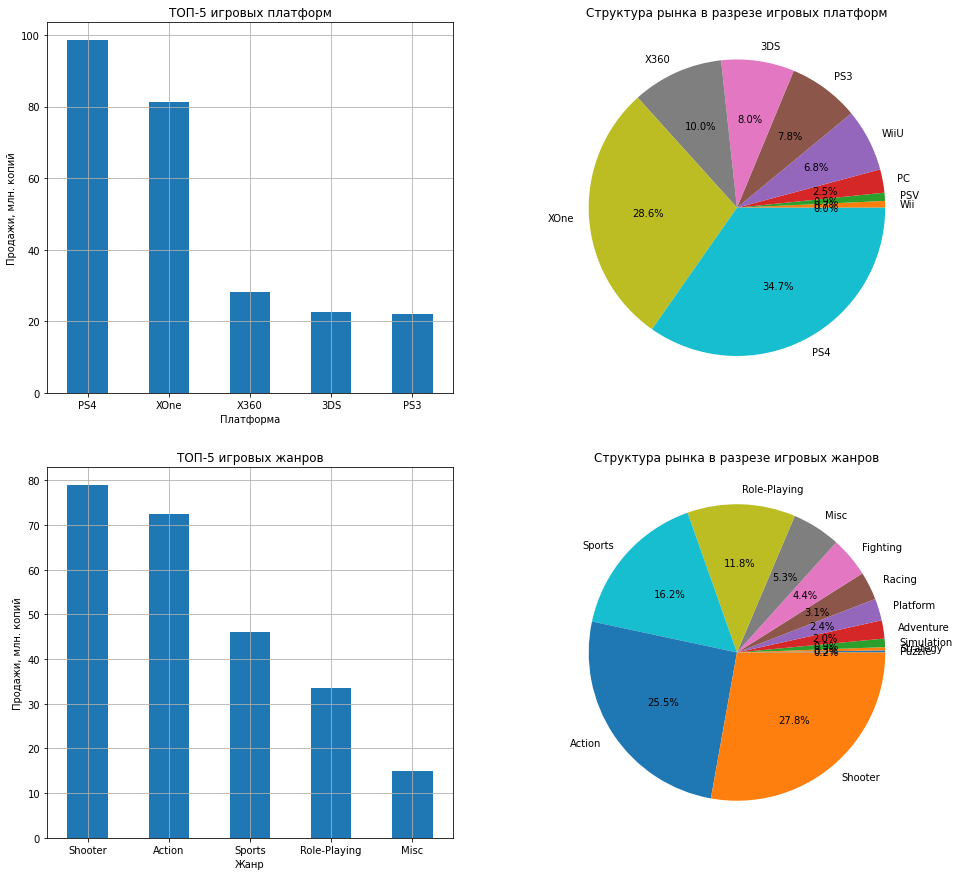

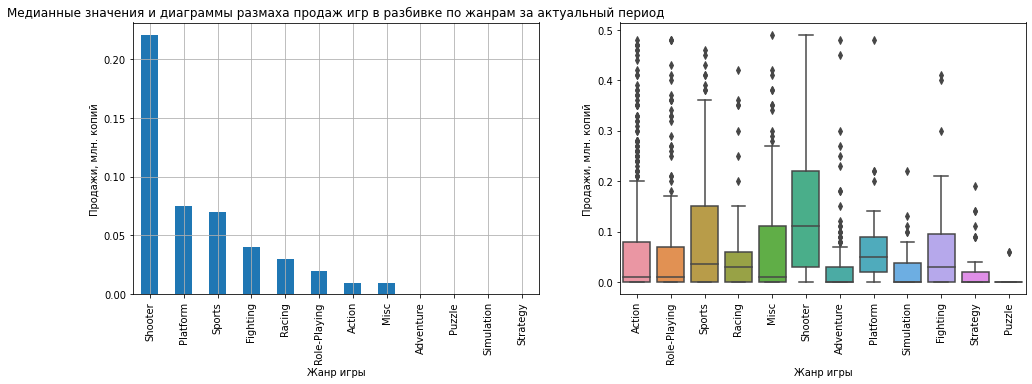

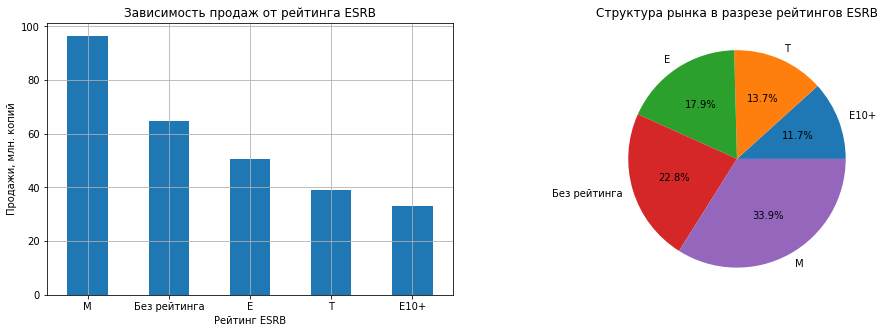



						----------------------------
						| Данные по региону Европа |
						----------------------------


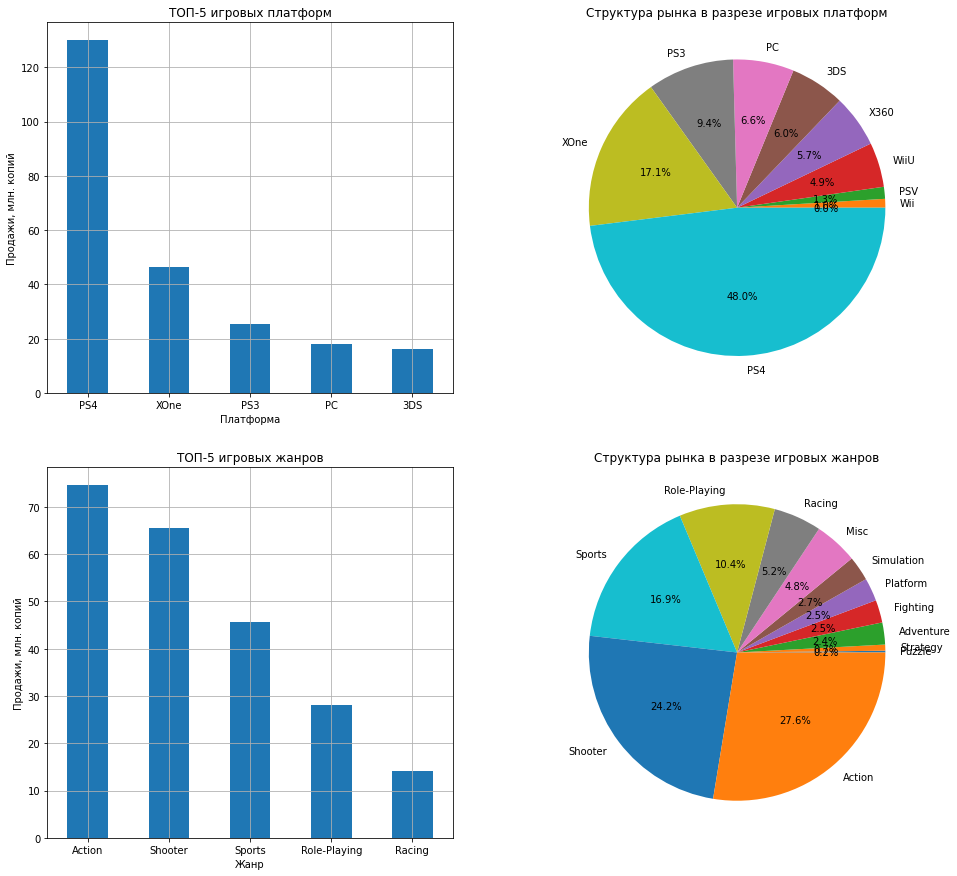

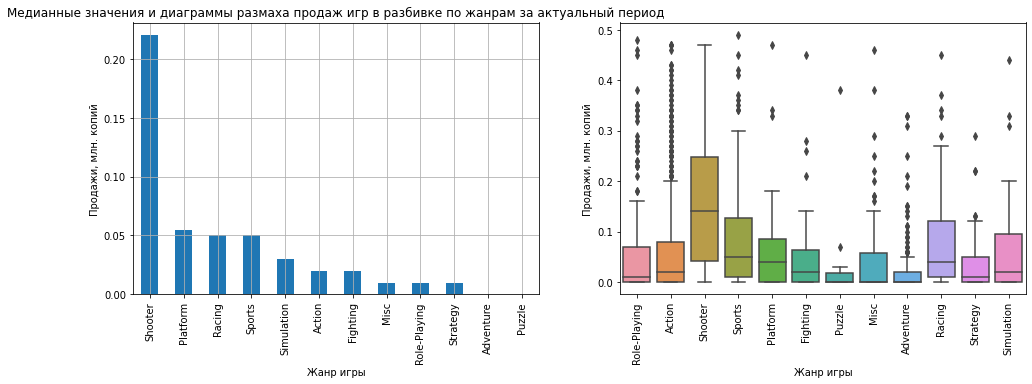

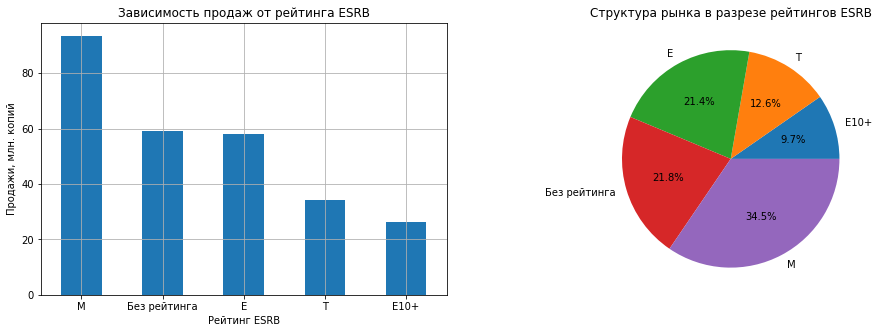



						----------------------------
						| Данные по региону Япония |
						----------------------------


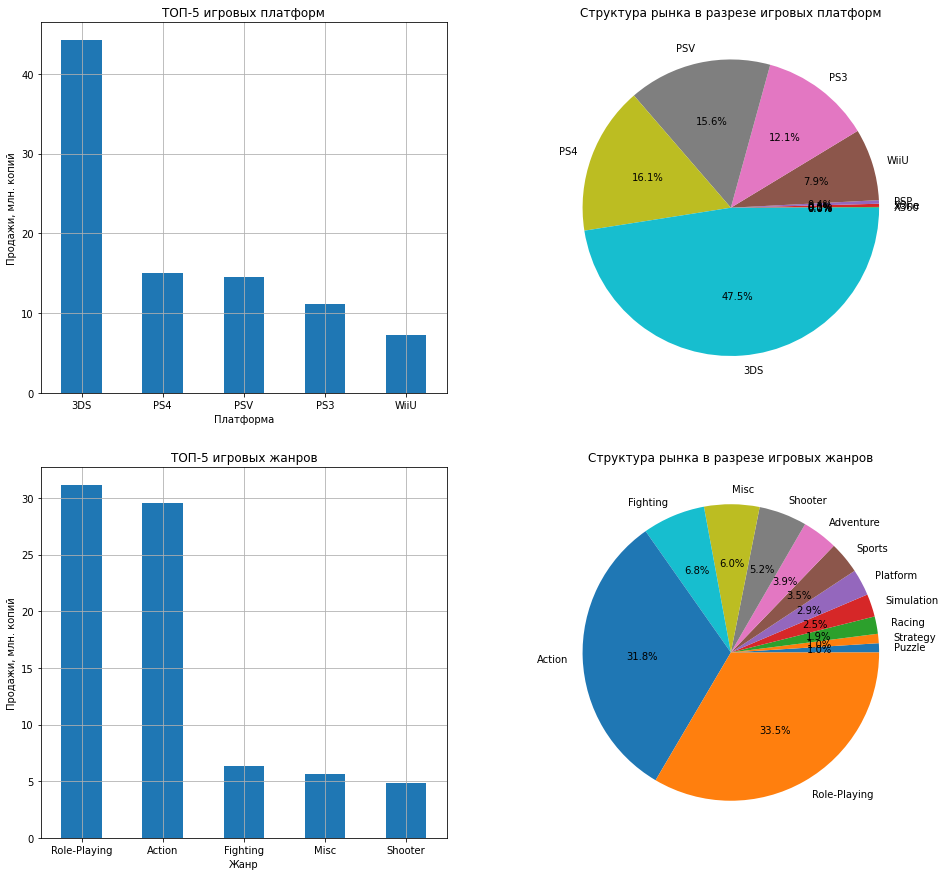

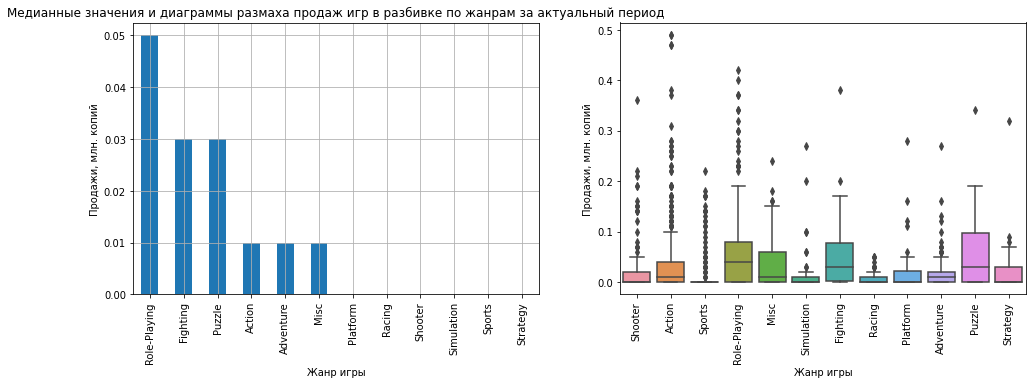

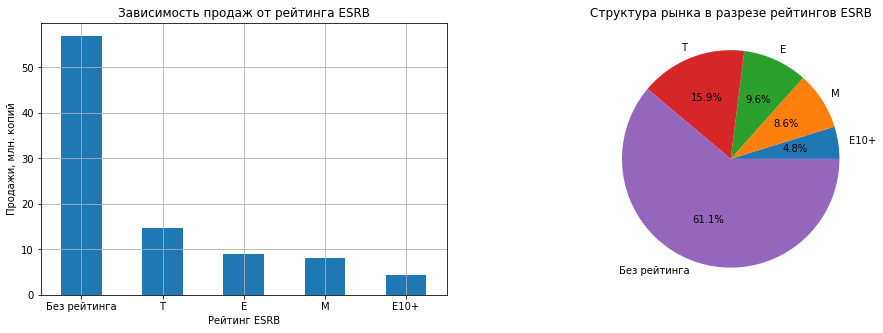



						-----------------------------
						| Данные по прочим регионам |
						-----------------------------


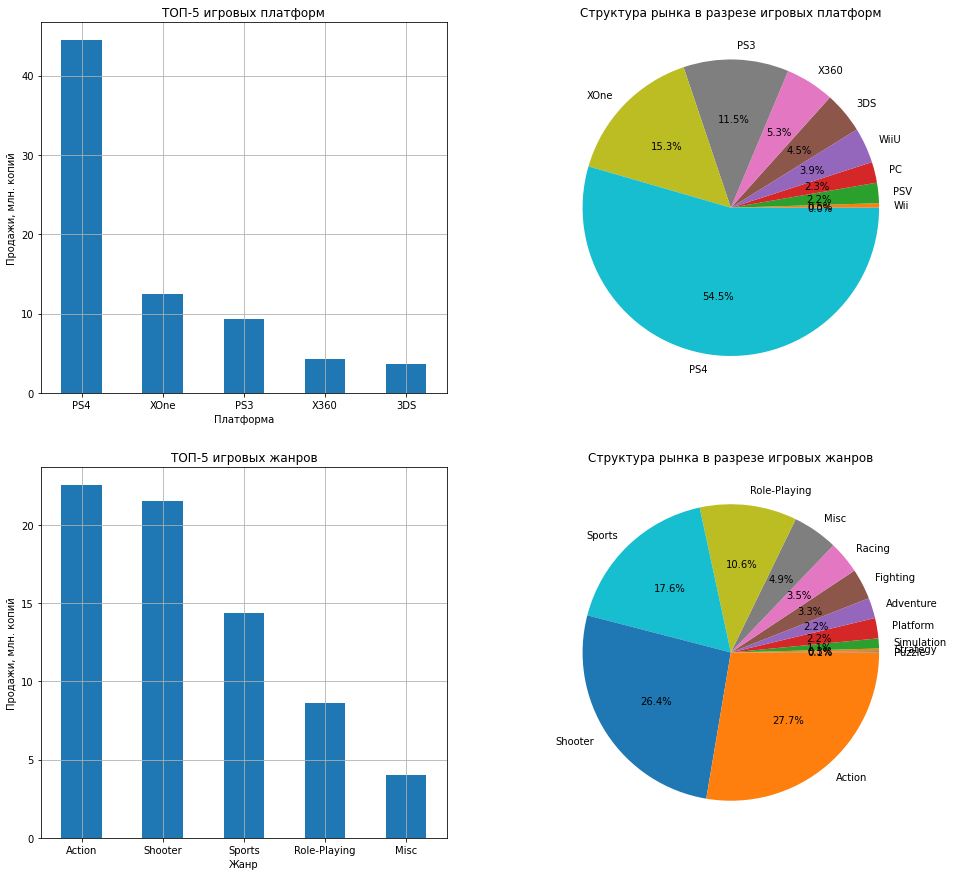

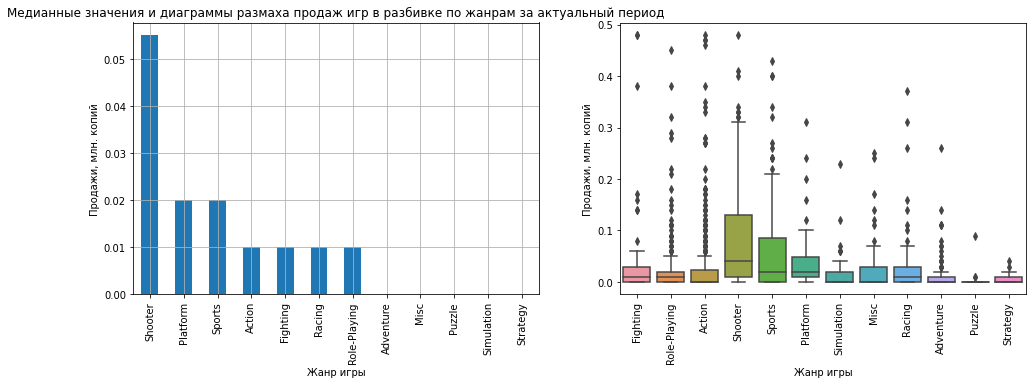

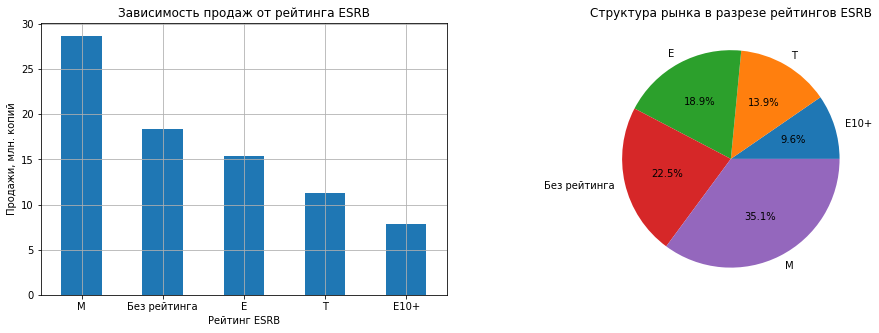

In [42]:
# замена пропусков в столбце 'rating' на фразу 'Без рейтинга'
data_act['rating'] = data_act['rating'].fillna('Без рейтинга')

print('\t\t\t\t\t\t--------------------------------------')
print('\t\t\t\t\t\t| Данные по региону Северная Америка |')
print('\t\t\t\t\t\t--------------------------------------')
portret_reg('na_sales')
print('\n\n\t\t\t\t\t\t----------------------------')
print('\t\t\t\t\t\t| Данные по региону Европа |')
print('\t\t\t\t\t\t----------------------------')
portret_reg('eu_sales')
print('\n\n\t\t\t\t\t\t----------------------------')
print('\t\t\t\t\t\t| Данные по региону Япония |')
print('\t\t\t\t\t\t----------------------------')
portret_reg('jp_sales')
print('\n\n\t\t\t\t\t\t-----------------------------')
print('\t\t\t\t\t\t| Данные по прочим регионам |')
print('\t\t\t\t\t\t-----------------------------')
portret_reg('other_sales')

					---------------------------------------------
					| Общая зависимость продаж от рейтинга ESRB |
					---------------------------------------------


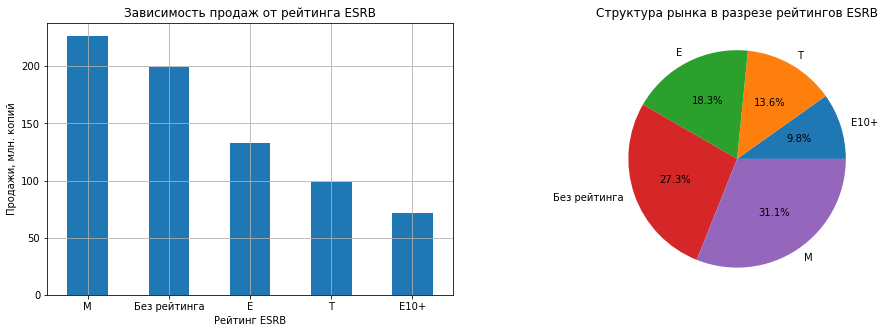

In [43]:
# дорисуем для дальнейшего сравнения и анализа общую зависимость продаж от рейтинга ESRB
print('\t\t\t\t\t---------------------------------------------')
print('\t\t\t\t\t| Общая зависимость продаж от рейтинга ESRB |')
print('\t\t\t\t\t---------------------------------------------')

data_act.groupby('rating')['total_sales'].sum().sort_values(ascending=False).plot(
    kind='bar', figsize=(16, 5), grid=True, rot=0, ax=plt.subplot(1, 2, 1))
plt.title('Зависимость продаж от рейтинга ESRB')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи, млн. копий')

data_act.groupby('rating')['total_sales'].sum().sort_values().plot(
    kind='pie', autopct='%1.1f%%', ax=plt.subplot(1, 2, 2))
plt.title('Структура рынка в разрезе рейтингов ESRB')
plt.xlabel('')
plt.ylabel('')
plt.show()

Наличие большой доли игр не имеющих рейтинга ESRB говорит о том, что данный рейтинг не является обязательным и единым для всех производителей. Игры могут вполне успешно существовать и распространяться без получения данного рейтинга.

Основные особенности регионов и профилей пользователей


1. Регион Северная Америка

    - В ТОП-5 игровых платформ по количеству продаж входят:
        - PS4 (Sony) с долей рынка 34,7%;
        - XOne (Microsoft) - 28,6%;
        - X360 (Microsoft) - 10%;
        - 3DS (Nintendo) - 8%;
        - PS3 (Sony) - 7,8%.
        Следует отметить, что по объемам продаж рынок Северной Америки самый большой. В ТОП-5 присутствуют игровые платформы всех трех основных производителей: американской компании Microsoft и японских компаний Sony и Nintendo.
    - В ТОП-5 игровых жанров по количеству продаж входят:
        - Shooter (стрелялки) с долей рынка 27,8%;
        - Action (экшен) - 25,5%;
        - Sports (спортивные) - 16,2%;
        - Role-Playing (ролевые) - 11,8%;
        - Misc (игры не попавшие в другие категории) - 5,3%.  
        Распределение жанров по объемам продаж полностью совпадает с общемировым.
    - В ТОП-5 игровых жанров по средним (медианным) значениям продаж входят:
        - Shooter (стрелялки);
        - Platform (платформеры);
        - Sports (спортивные);
        - Fighting (бой/поединок);
        - Racing (гонки).
        При этом жанр Shooter (стрелялки) идет с большим отрывом от всех остальных.
    - Структура продаж в разрезе рейтинга ESRB совпадает с общемировой:
        - на первом месте с отрывом от остальных игры с рейтингом M (для взрослых) - 33,9%;
        - на втором - игры с рейтингом E (для всех) - 17,9%;
        - на третьем - игры с рейтингом T (для подростков) - 13,7%;
        - на последнем - игры с рейтингом E10+ (для всех от 10 лет и старше) - 11,7%.  
        Доля игр без рейтинга ESRB (22,8%) аналогично общемировому тренду находится по уровню между первым и вторым местом.


2. Регион Европа
    - В ТОП-5 игровых платформ по количеству продаж входят:
        - PS4 (Sony) с долей рынка 48%;
        - XOne (Microsoft) - 17,1%;
        - PS3 (Sony) - 9,4%;
        - PC (персональный компьютер) - 6,6%;
        - 3DS (Nintendo) - 6%.  
        По объемам продаж рынок Европы сопоставим с рынком Северной Америки. В ТОП-5 есть игровые платформы всех трех основных производителей. Основную долю рынка занимает японская компания Sony, а её платформа PS4 занимает практически половину рынка Европы. Также обращает внимание наличие на четвертом месте игр для PC (персональный компьютер), что не характерно для общемировых трендов.
    - В ТОП-5 игровых жанров по количеству продаж входят:
        - Action (экшен) с долей рынка 27,6%;
        - Shooter (стрелялки) - 24,2%;
        - Sports (спортивные) - 16,9%;
        - Role-Playing (ролевые) - 10,4%;
        - Racing (гонки) - 5,2%.
        Первые четыре участника находятся и в общемировом ТОП-5, а на пятое место в данном регионе выдвинулись игры жанра Racing (гонки), находящиеся на седьмом месте в мировом ТОПе.
    - В ТОП-5 игровых жанров по средним (медианным) значениям продаж входят:
        - Shooter (стрелялки);
        - Platform (платформеры);
        - Racing (гонки);
        - Sports (спортивные);
        - Simulation (симуляторы).
        Жанр Shooter (стрелялки) идет с большим отрывом от всех остальных. Racing (гонки) поднимаются на третье место, а на пятом месте появляются игры жанра Simulation (симуляторы).
    - Структура продаж в разрезе рейтинга ESRB стабильна, без изменений:
        - на первом месте с отрывом от остальных игры с рейтингом M (для взрослых) - 34,5%;
        - на втором - игры с рейтингом E (для всех) - 21,4%;
        - на третьем - игры с рейтингом T (для подростков) - 12,6%;
        - на последнем - игры с рейтингом E10+ (для всех от 10 лет и старше) - 9,7%.  
        Доля игр без рейтинга ESRB (21,8%) находится на уровне второго места.


3. Регион Япония
    - В ТОП-5 игровых платформ по количеству продаж входят:
        - 3DS (Nintendo) с долей рынка 47,5%;
        - PS4 (Sony) - 16,1%;
        - PSV (Sony) 15,6%;
        - PS3 (Sony) - 12,1%;
        - WiiU (Nintendo) - 7,9%.  
        По объемам продаж рынок Японии занимает третье место после Северной Америки и Европы. В топе игровых платформ присутствуют только игровые платформы японских производителей. Если учесть, что суммарно доли игровых платформ из ТОП-5 составляют практически 100%, то можно сделать вывод, что весь рынок Японии поделен между японскими компаниями Nintendo и Sony. Категория игр для PC (персональный компьютер) практически также отсутствует.
    - В ТОП-5 игровых жанров по количеству продаж входят:
        - Role-Playing (ролевые) с долей рынка 33,5%;
        - Action (экшен) - 31,8%;
        - Fighting (бой/поединок) - 6,8%;
        - Misc (игры не попавшие в другие категории) - 6%;
        - Shooter (стрелялки) - 5,2%.  
        Две первые категории Role-Playing (ролевые) и Action (экшен) лидируют с огромным отрывом, занимая 2/3 рынка. Все остальные жанры ужимаются в оставшуюся треть.
    - В ТОП-5 игровых жанров по средним (медианным) значениям продаж входят:
        - Role-Playing (ролевые);
        - Fighting (бой/поединок);
        - Puzzle (головоломки);
        - Action (экшен);
        - Adventure (приключения).  
        Жанр Role-Playing (ролевые) идет с  отрывом от остальных. Очень перспективно смотрятся игры жанра Puzzle (головоломки), которые в мировом рейтинге занимают одно из последних мест.        
    - Структура продаж в разрезе рейтинга ESRB очень сильно отличается от общемировой:
        - на первом месте игры с рейтингом T (для подростков) - 15,9%;
        - на втором - игры с рейтингом E (для всех) - 9,6%;
        - на третьем - игры с рейтингом M (для взрослых) - 8,6%;
        - на последнем - игры с рейтингом E10+ (для всех от 10 лет и старше) - 4,8%.  
        Игры с рейтингом M (для взрослых), которые в ТОПах остальных регионов, занимают лишь третье место в рейтинга, а на первом месте с отрывом игры с рейтингом T (для подростков). Но самую большую долю в 2/3 рынка занимают игры без рейтинга ESRB (61,1%). Это говорит о том, что на рынке существенно преобладают местные продукты, которые не проходят рейтингование в североамериканской ESRB и это же подтверждается наличием на рынке только японских игровых платформ.


4. Прочие регионы
    - В ТОП-5 игровых платформ по количеству продаж входят:
        - PS4 (Sony) с долей рынка 54,5%;
        - XOne (Microsoft) - 15,3%;
        - PS3 (Sony) - 11,5%;
        - X360 (Microsoft) - 5,3%;
        - 3DS (Nintendo) - 4,5%.  
        Распределение игровых платформ очень похоже на рынок Северной Америки. На первом месте, занимая больше половины рынка, находится игровая платформа PS4 (Sony). По объемам продаж прочие регионы в сумме дают объем, сопоставимый с объемом рынка Японии.
    - В ТОП-5 игровых жанров по количеству продаж входят:
        - Action (экшен) с долей рынка 27,7%;
        - Shooter (стрелялки) - 26,4%;
        - Sports (спортивные) - 17,6%;
        - Role-Playing (ролевые) - 10,6%;
        - Misc (игры не попавшие в другие категории) - 4,9%.  
        Такое распределение практически совпадает с ТОП-5 игровых жанров на рынке Северной Америки, только здесь лидируют игры жанра Action (экшен).
    - В ТОП-5 игровых жанров по средним (медианным) значениям продаж входят:
        - Shooter (стрелялки);
        - Platform (платформеры);
        - Sports (спортивные);
        - Action (экшен);
        - Fighting (бой/поединок).
        При этом жанр Shooter (стрелялки) идет с большим отрывом от всех остальных.
    - Структура продаж в разрезе рейтинга ESRB совпадает с общемировой и рынком Америки:
        - на первом месте с отрывом от остальных игры с рейтингом M (для взрослых) - 35,1%;
        - на втором - игры с рейтингом E (для всех) - 18,9%;
        - на третьем - игры с рейтингом T (для подростков) - 13,9%;
        - на последнем - игры с рейтингом E10+ (для всех от 10 лет и старше) - 9,6%.  
        Доля игр без рейтинга ESRB (22,5%) аналогично общемировому тренду находится по уровню между первым и вторым местом.


В качестве общих выводов можно отметить, что рынки и профили пользователей региона Северная Америка и прочих регионов практически совпадает с общемировым. Рынок и профиль пользователя Европы имет небольшие особенности в части игровых платформ и жанров. Рынок Японии сильно специфичен по всем направлениям.

### 3.6. <a id='toc3_6_'></a>[Вывод по разделу 3](#toc0_)

Завершив исследовательский анализ можно сделать следующие выводы:
- Графики годовых объемов продаж и количества выпускаемых игр показывают, что рынок игр рос и достиг своего максимума в 2008 - 2009 годы. После этого произошел спад до уровней начала 2000-х годов.
- Игровых платформ много, но рынок формируют три основных производителя: Sony (Япония), Microsoft (США) и Nintendo (Япония), которым принадлежат большинство игровых платформ.
- Игровые платформы имеют жизненный цикл существования на рынке по завершению которого они устаревают, уходят с рынка и заменяются новыми игровыми платформами. У производителей существуют немного разные внутренние сроки жизненных циклов игровых платформ. В среднем жизненный цикл игровой платформы на рынке составляет 7 - 10 лет. Поэтому для планирования продаж в разрезе игровых платформ на следующий год актуально рассматривать период за предыдущие 3 - 6 лет. С учетом динамично меняющейся индустрии в качестве актуального периода берем 3 последних года.
- В ТОП-5 продаж игровых платформ входят платформы всех трех производителей. С большим отрывом лидирует в ТОП продаж игровая платформа PS4 (Sony).
- Продажи игр для персональных компьютеров занимают всего лишь 7 место и относительно небольшую долю рынка. Подавляющие объемы продаж приходятся на все возможные виды игровых консолей и станций.


- При формировании планов продаж на 2017г. исходя из имеющихся данных целесообразно ориентироваться на актуальные платформы всех ключевых производителей, а именно:
    - У производителя Sony делать ставку на платформу PS4, так как она является лидером рассматриваемом актуальном периоде и продажи игр для платформы PS4 в последние годы растут.
    - У производителя компании Microsoft делать ставку на платформу XOne. Она занимает второе место по продажам в актуальном периоде и её продажи растут в последние годы.
    - У производителя Nintendo ориентироваться на игровые платформы 3DS и WiiU, которые вышли на рынок практически одновременно и находятся примерно в одной стадии жизненного цикла. Это не новинки и их жизненные циклы перешагнули свои максимумы. Поэтому продажи следует планировать в меньшем объеме, чем для платформ PS4 (Sony) и XOne (Microsoft).
    - Также в структуре продаж имеет смысл сохранить продажи игр для персональных компьютеров (PC), так как персональные компьютеры, как игровая платформа и альтернатива, безусловно останутся существовать в перспективе. Объемы продаж сохранять на уровне прошлых лет.
    
    
- Существует корреляция между оценками критиков и объемами продажам. Это закономерно, так как высокие оценки профессиональных критиков могут использоваться в качестве дополнительной рекламы при продвижении продуктов. Корреляция между оценками пользователей и объемами продаж спорная, проявлялась только у двух из пяти исследуемых игровых платформ.


- Для учета влияния игровых жанров при планировании продаж необходимо учитывать следующие факторы и закономерности:
    - ТОП-7 игровых жанров по количеству выпущенных игр:
        - Action (экшен);
        - Role-Playing (ролевые);
        - Adventure (приключения);
        - Sports (спортивные);
        - Shooter (стрелялки);
        - Misc (прочее/разное - игры не попавшие в другие категории);
        - Racing (гонки).  
        При этом игры жанра Action (экшен) кратно опережают всех остальных.
    - ТОП-7 игровых жанров по количеству продаж:
        - Action (экшен);
        - Shooter (стрелялки);
        - Sports (спортивные);
        - Role-Playing (ролевые);
        - Misc (прочее/разное - игры не попавшие в другие категории);
        - Fighting (бой/поединок);
        - Racing (гонки).  
        Первое место но уже без большого отрыва от остальных занимают самые массовые игры жанра Action (экшен). Гораздо большими объемами по сравнению с остальными выделяются первые 4 игровых жанра из ТОП.
    - Анализируя медианные значения и диаграммы размаха по жанрам, видим, что на самом деле самым стабильным жанром, который приносит доход не зависимо от платформы, является жанр Shooter (стрелялки). По данному показателю он значительно обходит все остальные жанры. Далее с большим отставанием в ТОП-5 попадают:
        - Sports (спортивные);
        - Platform (платформеры);
        - Fighting (бой/поединок);
        - Role-Playing (ролевые).
    
    
- Существует определенная специфика рынков и пользователей в разных регионах, которую необходимо учитывать при формировании планов продаж. В эту специфику входят:
    - различия в предпочтениях использования игровых платформ;
    - различия в жанровых предпочтениях;
    - различия в предпочтениях игр различных категорий по классификации ESRB (Entertainment Software Rating Board).
- Рейтинг игровых рынков по объемам продаж выглядит следующим образом:
    - Северная Америка;
    - Европа;
    - Япония;
    - прочие регионы.
- Рынки и профили пользователей региона Северная Америка и прочих регионов практически совпадает с общемировым. Рынок и профиль пользователей Европы имет небольшие особенности в части игровых платформ и жанров. Рынок и профиль пользователей региона Япония во многом специфичен и уникален по всем направлениям. Более детальный анализ всех рынков и профилей представлен в разделе 3.5.

## 4. <a id='toc4_'></a>[Проверка гипотез](#toc0_)



### 4.1. <a id='toc4_1_'></a>[Проверка гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые"](#toc0_)

Выборки пользовательских рейтингов игровых платформ являются независимыми, так как мнение пользователей по отношению к одной игровой платформе не связано с их мнением о других игровых платформах. Дисперсия таких выборок может быть разной. Сама гипотеза является двусторонней.

Нулевая гипотеза:  
H_0: Средний пользовательский рейтинг (user_score) игровой платформы Xbox One (XOne) = Средний пользовательский рейтинг (user_score) игровой платформы на базе персонального компьютера (PC)

Альтернативная гипотеза:  
H_a: Средний пользовательский рейтинг (user_score) игровой платформы Xbox One (XOne) ≠ Средний пользовательский рейтинг (user_score) игровой платформы на базе персонального компьютера (PC)

alpha = 0.05

In [44]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(data_act[data_act['platform'] == 'XOne']['user_score'].dropna(), 
                       data_act[data_act['platform'] == 'PC']['user_score'].dropna(), equal_var = False)

# установка уровня значимости
alpha = .05

# значения p-value 
print(results.pvalue)

# определение вывода
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


P-значение не меньше установленного уровня значимости 0,05, мы не можем отвергнуть нулевую гипотезу. У нас нет достаточных доказательств, чтобы сказать, что между средними пользовательскими рейтингами для платформ Xbox One и PC есть существенная разница. Вероятность получить одинаковые средние рейтинги для платформ Xbox One и PC высока.

### 4.2. <a id='toc4_2_'></a>[Проверка гипотезы "средние пользовательские рейтинги жанров Action и Sports разные"](#toc0_)

Выборки пользовательских рейтингов по игровым жанрам являются независимыми, так как пользователям могут одновременно нравится или не нравится несколько разных игровых жанров. Дисперсия таких выборок может быть разной. Сама гипотеза является двусторонней.

Нулевая гипотеза:  
H_0: Средний пользовательский рейтинг (user_score) игрового жанра Action = Средний пользовательский рейтинг (user_score) игрового жанра Sports

Альтернативная гипотеза:  
H_a: Средний пользовательский рейтинг (user_score) игрового жанра Action ≠ Средний пользовательский рейтинг (user_score) игрового жанра Sports

alpha = 0.05

In [45]:
# вызов метода для проверки гипотезы
results = st.ttest_ind(data_act[data_act['genre'] == 'Action']['user_score'].dropna(), 
                       data_act[data_act['genre'] == 'Sports']['user_score'].dropna(), equal_var = False)

# установка уровня значимости
alpha = .05

# значения p-value 
print(results.pvalue)

# определение вывода
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825550382644557e-14
Отвергаем нулевую гипотезу


P-значение меньше установленного уровня значимости 0,05, мы можем отвергнуть нулевую гипотезу. У нас есть достаточные доказательства, чтобы сказать, что между средними пользовательскими рейтингами жанров Action и Sports есть статистически значимая разница.

### 4.3. <a id='toc4_3_'></a>[Вывод по разделу 4](#toc0_)

Мы проверили две гипотезы о сравнении пользовательских рейтингов. Для проверки был использован t-критерий Стьюдента-Уэлча, так как нам необходимо было сравнить только две независимые выборки с предположительно нормальным распределением и с предположительно разной дисперсией (проводить дисперсионный анализ не требуется).   
В качестве нулевой гипотезы в обоих случаях принималась гипотеза о ревенстве средних величин двух выборок. В качестве альтернативной гипотезы выдвигалась двусторонняя гипотеза о неравенстве средних величин двух выборок, так как вероятностная разница между средними величинами двух выборок допустима как в большую, так и в меньшую сторону и с точки зрения поставленных для исследования вопросов направление разницы значения не имеет.  
В качестве уровня значимости alfa выбрано значение 0,05 (уровень 5% ошибки), которого достаточно для данного сравнения.  
В ходе проверки производилось сравнение p-значения (результата t-критерий Стьюдента-Уэлча) с выбранным уровнем значимости alfa. В случае, если p-значение было меньше alfa, нулевая гипотеза отвергалась. В случае, если p-значение было больше или равно alfa, оснований для того, чтобы отвергнуть нулевую гипотезу не было.
- При проверке первой гипотезы p-значение было не меньше установленного уровня значимости 0,05, поэтому мы не можем отвергнуть нулевую гипотезу. У нас нет достаточных доказательств, чтобы сказать, что между средними пользовательскими рейтингами для платформ Xbox One и PC есть существенная разница. Вероятность получить одинаковые средние рейтинги для платформ Xbox One и PC высока.
- При проверке второй гипотезы p-значение меньше установленного уровня значимости 0,05, мы можем отвергнуть нулевую гипотезу. У нас есть достаточные доказательства, чтобы сказать, что между средними пользовательскими рейтингами жанров Action и Sports есть существенная разница.

Для дополнительного контроля возможных ошибок и в качестве иллюстрации не противоречивости проверки наших гипотез выведем средние пользовательские рейтинги и по платформам и жанрам.

In [46]:
print(data_act.groupby('platform')['user_score'].mean().sort_values())
print()
print(data_act.groupby('genre')['user_score'].mean().sort_values())

platform
X360    5.771084
PS3     6.014286
PC      6.298361
Wii     6.350000
XOne    6.594545
PS4     6.828099
WiiU    7.087500
3DS     7.138182
PSV     7.656164
PSP          NaN
Name: user_score, dtype: float64

genre
Sports          5.225197
Racing          6.327451
Simulation      6.504167
Shooter         6.549074
Platform        6.741379
Action          6.760606
Misc            6.968293
Fighting        6.983784
Strategy        7.216667
Role-Playing    7.348571
Adventure       7.470213
Puzzle          7.975000
Name: user_score, dtype: float64


## 5. <a id='toc5_'></a>[Общий вывод](#toc0_)

В качестве иходных данных использована база с информацией из открытых источников (исторические данные о продажах игр, оценки пользователей и экспертов, статистика по игровым жанрам и платформам, рейтинги ESRB). Информация датированна 2016 годом и ранее. Объем выборки в размере около 17 тысяч строк достаточен для объективного исследования. Данные за 2016г. неполные, но их не отбрасываем, чтобы минимизировать разрыв с 2017 годом, для которого планируется формировать планы продаж.

База содержала пропуски и некорректные значения, поэтому на этапе предобработки данных были выполнены следующие процедуры:
- унификация названий столбцов;
- анализ и корректировка аномальных значений и типов данных;
- изучение и заполнение пропусков;
- проверка на наличие дубликатов;
- добавление вспомогательных столбцов, необходимых для дальнейшего анализа.

По результатам проведения исследований выявлены следующие особенности и закономерности.
- Объемы продаж и количество выпускаемых в год игр достигали своих максимумов в 2008 - 2009гг. После этого на рынке электронных игр произошел спад до уровней начала 2000-х годов.
- При формировании планов продаж необходимо учитывать следующие особенности рынка:
    - зависимость от игровой платформы;
    - зависимость от игрового жанра;
    - зависимость от региона продаж;
    - зависимость от оценок пользователей и критиков.
- С учетом жизненного цикла цгровых платформ и динамично меняющейся отрасли качестве актуального периода берем 3 последних года.


- Влияние игровой платформы.
    - На рынке существует множество игровых платформ, но практически все они принадлежат трем основным производителям: Sony (Япония), Microsoft (США) и Nintendo (Япония). По продажам с большим отрывом лидирует платформа PS4 (Sony), но в ТОП-5 входят игровые платформы всех трех основных производителей. Продажи игр для персональных компьютеров занимают лишь 7 место в рейтинге и имеют относительно небольшую долю рынка.
    - Все игровые платформы, за исключением персональных компьютеров (PC), имеют на игровом рынке свой жизненный цикл, по завершению которого они устаревают, уходят с рынка и заменяются новыми платформами. В среднем жизненный цикл игровой платформы составляет 7 - 10 лет.
    - Целесообразно ориентироваться на актуальные на текущий момент платформы всех трех основных производителей:
        - Sony, игровая платформа PS4. Является лидером продаж в актуальном периоде, последние годы продажи игр на этой платформе растут.
        - Microsoft, игровая платформа XOne. Занимает второе место по продажам в актуальном периоде, последние годы продажи игр на этой платформе растут.
        - Nintendo, игровые платформы 3DS и WiiU от Nintendo - типичные середнячки. Продажи следует планировать в меньшем объеме, чем для платформ PS4 (Sony) и XOne (Microsoft).
    - Имеет смысл сохранить в структуре продаж игры для персональных компьютеров (PC) как постоянно существующую альтернативу игровым консолям и станциям на уровне, равном объемам продаж прошлых лет.


- Влияние игрового жанра.
    - ТОП-7 игровых жанров по количеству выпущенных игр:
        - Action (экшен);
        - Role-Playing (ролевые);
        - Adventure (приключения);
        - Sports (спортивные);
        - Shooter (стрелялки);
        - Misc (прочее/разное - игры не попавшие в другие категории);
        - Racing (гонки).  
        При этом игры жанра Action (экшен) кратно опережают всех остальных.
    - ТОП-7 игровых жанров по количеству продаж:
        - Action (экшен);
        - Shooter (стрелялки);
        - Sports (спортивные);
        - Role-Playing (ролевые);
        - Misc (прочее/разное - игры не попавшие в другие категории);
        - Fighting (бой/поединок);
        - Racing (гонки).  
        Первое место но уже без большого отрыва от остальных занимают самые массовые игры жанра Action (экшен). Гораздо большими объемами по сравнению с остальными выделяются первые 4 игровых жанра из ТОП.
    - Анализируя медианные значения и диаграммы размаха по жанрам, видим, что на самом деле самым стабильным жанром, который приносит доход не зависимо от платформы, является жанр Shooter (стрелялки). По данному показателю он значительно обходит все остальные жанры. Далее с большим отставанием в ТОП-5 попадают:
        - Sports (спортивные);
        - Platform (платформеры);
        - Fighting (бой/поединок);
        - Role-Playing (ролевые).


- Влияние региона продаж.
    - Рейтинг игровых рынков регионов по объемам продаж:
        - Северная Америка;
        - Европа;
        - Япония;
        - прочие регионы.  
        При этом объем рынка Европы сопоставим с объемом рынка Северной Америки, а объемы прочих рынков суммарно сопоставимы с объемом рынка Японии.
    - Специфику регионов определяют:
        - различия в предпочтениях игровых платформ;
        - различия в жанровых предпочтениях;
        - различия в предпочтениях игр по классификации ESRB (Entertainment Software Rating Board).
    - Общие выводы по специфике региональных рынков следующие:
        - Рынки и профили пользователей региона Северная Америка и прочих регионов практически совпадает с общемировым.
        - Рынок и профиль пользователей Европы имет небольшие особенности в части игровых платформ и жанров.
        - Рынок и профиль пользователей региона Япония во многом специфичен и уникален по всем направлениям.  
        Рекомендуется ознакомиться с детальным анализом региональных рынков в разделе 3.5.


- Влияние оценок пользователей и критиков.
    - Существует корреляция между оценками критиков и объемами продажам. Причиной этого, скорее всего, является то, что высокие оценки игр, сделанные профессиональными критиками и экспертами, могут использоваться в качестве дополнительных аргументов при продвижении продукта. Корреляция между оценками пользователей и объемами продаж спорная, проявилась только у двух из пяти исследуемых игровых платформ.
    - Проверки гипотез, касающихся оценок пользователей показали, что:
        - При проверке первой гипотезы p-значение было не меньше установленного уровня значимости 0,05, поэтому мы не можем отвергнуть нулевую гипотезу. У нас нет достаточных доказательств, чтобы сказать, что между средними пользовательскими рейтингами для платформ Xbox One и PC есть существенная разница. Вероятность получить одинаковые средние рейтинги для платформ Xbox One и PC высока.
        - При проверке второй гипотезы p-значение меньше установленного уровня значимости 0,05, мы можем отвергнуть нулевую гипотезу. У нас есть достаточные доказательства, чтобы сказать, что между средними пользовательскими рейтингами жанров Action и Sports есть существенная разница.
        

- Рекомендации для отдела маркетинга:
    - регион Северная Америка:
        - игровые платформы: PS4 (Sony), XOne (Microsoft);
        - игровые жанры: Shooter (стрелялки) и популярные Action (экшен), Sports (спортивные), Fighting (бой/поединок);
        - рейтинги ESRB: M (для взрослых), в меньшей степени E (для всех).
    - регион Европа:
        - игровые платформы: PS4 (Sony) в существенно большей степени, XOne (Microsoft) в меньшей степени;
        - игровые жанры: Shooter (стрелялки) и популярные Action (экшен), Racing (гонки), Sports (спортивные);
        - рейтинги ESRB: M (для взрослых), в меньшей степени E (для всех).
    - регион Япония:
        - игровые платформы: 3DS (Nintendo);
        - игровые жанры: Role-Playing (ролевые) в большей степени, Fighting (бой/поединок), Puzzle (головоломки);
        - рейтинги ESRB: местного производства без рейтинга, если с рейтингом, то в приоритете T (для подростков).
    - Прочие регионы:
        - игровые платформы: PS4 (Sony);
        - игровые жанры: Shooter (стрелялки) и популярные Action (экшен), Sports (спортивные), Platform (платформеры);
        - рейтинги ESRB: M (для взрослых), в меньшей степени E (для всех).
    - Для всех регионов: на отзывы пользователей внимания можно не обращать, к отзывам критиков прислушиваться.